In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

import time

In [184]:
from sklearn.preprocessing import RobustScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# decision tree, logistic
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.linear_model import LogisticRegressionCV

# clustering analysis
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import jaccard_score, adjusted_rand_score, silhouette_score, calinski_harabasz_score, roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import contingency_matrix

# ensemble methods
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFECV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [185]:
df=pd.read_excel("CardiacPrediction.xlsx")
df.head()

SEQN  Gender  Age  Annual-Family-Income  Ratio-Family-Income-Poverty  \
0     2       1   77                     8                         5.00   
1     5       1   49                    11                         5.00   
2    12       1   37                    11                         4.93   
3    13       1   70                     3                         1.07   
4    14       1   81                     5                         2.67   

   X60-sec-pulse  Systolic  Diastolic  Weight  Height  ...  Total-Cholesterol  \
0             68        98         56    75.4   174.0  ...               5.56   
1             66       122         83    92.5   178.3  ...               7.21   
2             64       174         99    99.2   180.0  ...               4.03   
3            102       130         66    63.6   157.7  ...               8.12   
4             72       136         61    75.5   166.2  ...               4.50   

    HDL  Glycohemoglobin  Vigorous-work  Moderate-work  Health-Insurance  \
0  1.39              4.7              3              3                 1   
1  1.08              5.5              1              1                 1   
2  0.98              5.2              2              1                 1   
3  1.28              7.6              3              3                 1   
4  1.04              5.8              1              1                 1   

   Diabetes  Blood-Rel-Diabetes  Blood-Rel-Stroke  CoronaryHeartDisease  
0         2                   2                 2                     0  
1         2                   2                 2                     0  
2         2                   1                 1                     0  
3         1                   1                 2                     0  
4         2                   2                 2                     0  

[5 rows x 51 columns]

In [186]:
todrop1 = ['SEQN','Annual-Family-Income','Ratio-Family-Income-Poverty','HDL','Glycohemoglobin',
            'Lymphocyte','Monocyte','Eosinophils','Basophils','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.',
            'Mean-cell-Hemoglobin','Mean-Platelet-Vol','Segmented-Neutrophils','Red-Cell-Distribution-Width','Albumin',
           'ALP','AST','ALT','GGT','Iron','LDH','Phosphorus','Bilirubin','Protein','Uric.Acid','Cholesterol',
           'HDL','Glycohemoglobin','Vigorous-work','Moderate-work','Health-Insurance','Blood-Rel-Diabetes',
           'Blood-Rel-Stroke','Weight','Height']
df.drop(todrop1, inplace=True, axis=1)
df.head(10)
#df.tail(10)

Gender  Age  X60-sec-pulse  Systolic  Diastolic  Body-Mass-Index  \
0       1   77             68        98         56            24.90   
1       1   49             66       122         83            29.10   
2       1   37             64       174         99            30.62   
3       1   70            102       130         66            25.57   
4       1   81             72       136         61            27.33   
5       2   38             68       109         69            26.68   
6       2   85             66       139         60            19.96   
7       2   23             72       103         60            23.68   
8       2   53             82       114         71            25.93   
9       2   42             74       119         85            37.60   

   White-Blood-Cells  Red-Blood-Cells  Hemoglobin  Platelet-count  Hematocrit  \
0                7.6             4.73        14.1           214.0        41.8   
1                5.9             5.13        14.5           209.0        43.6   
2               10.2             5.76        16.0           357.0        48.1   
3               11.6             5.53        16.8           228.0        50.4   
4                9.1             5.32        16.6           160.0        48.1   
5                7.6             4.14        13.3           255.0        40.2   
6                7.4             3.57        10.9           219.0        33.3   
7                5.6             4.53        14.5           220.0        41.2   
8                9.4             4.34        14.7           331.0        42.0   
9                7.8             4.31        13.4           337.0        38.3   

   Creatinine  Glucose  Triglycerides  Total-Cholesterol  Diabetes  \
0        61.9    4.330          1.298               5.56         2   
1        70.7    5.273          3.850               7.21         2   
2        88.4    4.163          1.581               4.03         2   
3        61.9    7.882          3.635               8.12         1   
4        88.4    6.384          0.756               4.50         2   
5        53.0    5.162          0.756               5.15         2   
6        79.6    4.163          0.474               4.24         2   
7        26.5    4.774          1.242               3.75         2   
8        53.0    4.718          0.847               5.66         2   
9        44.2    5.273          2.077               4.11         2   

   CoronaryHeartDisease  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     0  
9                     0

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                37079 non-null  int64  
 1   Age                   37079 non-null  int64  
 2   X60-sec-pulse         37079 non-null  int64  
 3   Systolic              37079 non-null  int64  
 4   Diastolic             37079 non-null  int64  
 5   Body-Mass-Index       37079 non-null  float64
 6   White-Blood-Cells     37079 non-null  float64
 7   Red-Blood-Cells       37079 non-null  float64
 8   Hemoglobin            37079 non-null  float64
 9   Platelet-count        37079 non-null  float64
 10  Hematocrit            37079 non-null  float64
 11  Creatinine            37079 non-null  float64
 12  Glucose               37079 non-null  float64
 13  Triglycerides         37079 non-null  float64
 14  Total-Cholesterol     37079 non-null  float64
 15  Diabetes           

In [188]:
# check if there is any missing data
df.isnull().sum()

Gender                  0
Age                     0
X60-sec-pulse           0
Systolic                0
Diastolic               0
Body-Mass-Index         0
White-Blood-Cells       0
Red-Blood-Cells         0
Hemoglobin              0
Platelet-count          0
Hematocrit              0
Creatinine              0
Glucose                 0
Triglycerides           0
Total-Cholesterol       0
Diabetes                0
CoronaryHeartDisease    0
dtype: int64

In [189]:
# classes are in target variable
df['CoronaryHeartDisease'].value_counts()

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

In [190]:
df.isna().sum()

Gender                  0
Age                     0
X60-sec-pulse           0
Systolic                0
Diastolic               0
Body-Mass-Index         0
White-Blood-Cells       0
Red-Blood-Cells         0
Hemoglobin              0
Platelet-count          0
Hematocrit              0
Creatinine              0
Glucose                 0
Triglycerides           0
Total-Cholesterol       0
Diabetes                0
CoronaryHeartDisease    0
dtype: int64

In [191]:
Duplicated=df.duplicated()
Duplicated2=pd.Series.to_frame(Duplicated)
Duplicated2.head()
print(Duplicated2.loc[Duplicated2.loc[:,0]==True])
df.loc[37078, :]
df.duplicated().sum()

Empty DataFrame
Columns: [0]
Index: []


0

In [192]:
print("The DataFrame has", df.shape[0], "rows and", df.shape[1], "columns.")

The DataFrame has 37079 rows and 17 columns.


In [193]:
df.columns

Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Body-Mass-Index', 'White-Blood-Cells', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Hematocrit', 'Creatinine', 'Glucose',
       'Triglycerides', 'Total-Cholesterol', 'Diabetes',
       'CoronaryHeartDisease'],
      dtype='object')

In [194]:
df.columns = ['Gender', 'Age', 'minute_pulse', 'Systolic', 'Diastolic',
       'BMI', 'WBC', 'RBC', 'Hemoglobin',
       'Platelet_count', 'Hematocrit', 'Creatinine', 'Glucose',
       'Triglycerides', 'Cholesterol', 'Diabetes',
       'CoronaryHeartDisease']

In [195]:
df.describe().transpose()

count        mean        std     min      25%  \
Gender                37079.0    1.513282   0.499830   1.000    1.000   
Age                   37079.0   48.943661  18.010440  20.000   33.000   
minute_pulse          37079.0   72.579250  12.242108  32.000   64.000   
Systolic              37079.0  124.090078  19.254741   0.000  111.000   
Diastolic             37079.0   69.919253  13.575804   0.000   62.000   
BMI                   37079.0   28.824588   6.608982  13.180   24.220   
WBC                   37079.0    7.269524   2.478754   1.400    5.700   
RBC                   37079.0    4.668632   0.509368   2.260    4.320   
Hemoglobin            37079.0   14.139073   1.541599   5.800   13.100   
Platelet_count        37079.0  253.012886  67.403298   4.000  208.000   
Hematocrit            37079.0   41.695175   4.374323  19.700   38.700   
Creatinine            37079.0   78.632276  39.157384  17.700   61.880   
Glucose               37079.0    5.595013   2.059786   1.050    4.718   
Triglycerides         37079.0    1.695405   1.283654   0.102    0.903   
Cholesterol           37079.0    5.081713   1.072682   1.530    4.320   
Diabetes              37079.0    1.907333   0.349674   1.000    2.000   
CoronaryHeartDisease  37079.0    0.040670   0.197527   0.000    0.000   

                          50%      75%       max  
Gender                  2.000    2.000     2.000  
Age                    48.000   63.000    85.000  
minute_pulse           72.000   80.000   224.000  
Systolic              121.000  134.000   270.000  
Diastolic              70.000   78.000   132.000  
BMI                    27.800   32.100   130.210  
WBC                     6.900    8.400   117.200  
RBC                     4.660    5.010     8.300  
Hemoglobin             14.100   15.200    19.700  
Platelet_count        246.000  290.000  1000.000  
Hematocrit             41.800   44.800    59.000  
Creatinine             73.370   88.400  1573.520  
Glucose                 5.110    5.662    34.250  
Triglycerides           1.344    2.066    34.559  
Cholesterol             5.020    5.740    14.090  
Diabetes                2.000    2.000     3.000  
CoronaryHeartDisease    0.000    0.000     1.000

In [196]:
df.drop(df.query('BMI >80 or BMI <15').index, axis=0, inplace=True)
df.drop(df.query('minute_pulse>200').index, axis=0, inplace=True)

In [197]:
df.head(10).transpose()

0        1        2        3        4        5  \
Gender                  1.000    1.000    1.000    1.000    1.000    2.000   
Age                    77.000   49.000   37.000   70.000   81.000   38.000   
minute_pulse           68.000   66.000   64.000  102.000   72.000   68.000   
Systolic               98.000  122.000  174.000  130.000  136.000  109.000   
Diastolic              56.000   83.000   99.000   66.000   61.000   69.000   
BMI                    24.900   29.100   30.620   25.570   27.330   26.680   
WBC                     7.600    5.900   10.200   11.600    9.100    7.600   
RBC                     4.730    5.130    5.760    5.530    5.320    4.140   
Hemoglobin             14.100   14.500   16.000   16.800   16.600   13.300   
Platelet_count        214.000  209.000  357.000  228.000  160.000  255.000   
Hematocrit             41.800   43.600   48.100   50.400   48.100   40.200   
Creatinine             61.900   70.700   88.400   61.900   88.400   53.000   
Glucose                 4.330    5.273    4.163    7.882    6.384    5.162   
Triglycerides           1.298    3.850    1.581    3.635    0.756    0.756   
Cholesterol             5.560    7.210    4.030    8.120    4.500    5.150   
Diabetes                2.000    2.000    2.000    1.000    2.000    2.000   
CoronaryHeartDisease    0.000    0.000    0.000    0.000    0.000    0.000   

                            6        7        8        9  
Gender                  2.000    2.000    2.000    2.000  
Age                    85.000   23.000   53.000   42.000  
minute_pulse           66.000   72.000   82.000   74.000  
Systolic              139.000  103.000  114.000  119.000  
Diastolic              60.000   60.000   71.000   85.000  
BMI                    19.960   23.680   25.930   37.600  
WBC                     7.400    5.600    9.400    7.800  
RBC                     3.570    4.530    4.340    4.310  
Hemoglobin             10.900   14.500   14.700   13.400  
Platelet_count        219.000  220.000  331.000  337.000  
Hematocrit             33.300   41.200   42.000   38.300  
Creatinine             79.600   26.500   53.000   44.200  
Glucose                 4.163    4.774    4.718    5.273  
Triglycerides           0.474    1.242    0.847    2.077  
Cholesterol             4.240    3.750    5.660    4.110  
Diabetes                2.000    2.000    2.000    2.000  
CoronaryHeartDisease    0.000    0.000    0.000    0.000

# Analysis Before Feature Selection
### 1:MALE  2:FEMALE

Text(0, 0.5, 'Count')

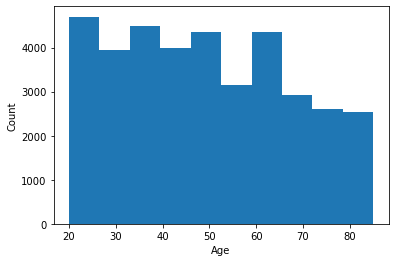

In [198]:
plt.hist(df['Age'], bins=None, range=None, density=False)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0.5, 1.0, 'Gender')

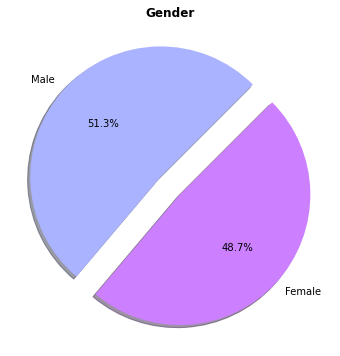

In [199]:
fig, ax = plt.subplots(1,1, figsize = (6,6))


labels = ["Male", "Female"]
values = df['Gender'].value_counts().tolist()[:2]
ax.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

Text(0, 0.5, 'Count')

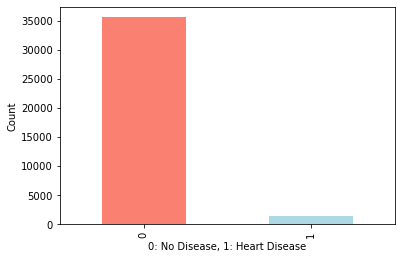

In [200]:
df['CoronaryHeartDisease'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count')

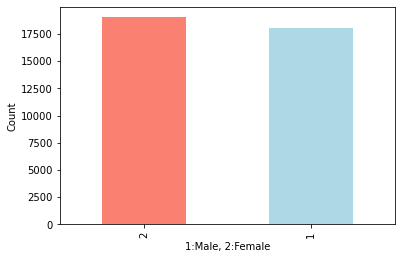

In [201]:
df['Gender'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('1:Male, 2:Female')
plt.ylabel('Count');

In [202]:
pd.crosstab(df['Gender'], df['CoronaryHeartDisease'])

CoronaryHeartDisease      0     1
Gender                           
1                     17022  1021
2                     18534   487

<AxesSubplot:xlabel='Gender', ylabel='count'>

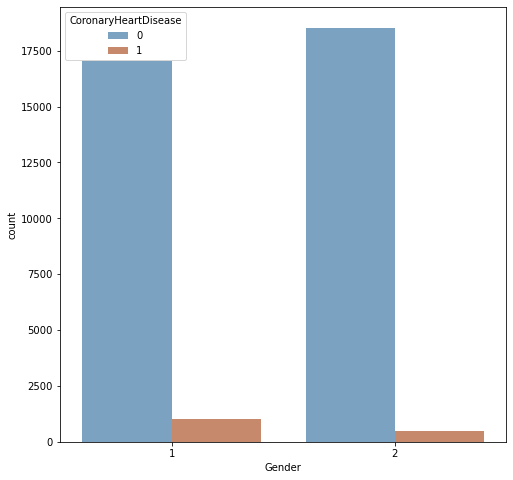

In [203]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['Gender'],data=df,hue='CoronaryHeartDisease',palette="twilight_shifted",saturation=2,dodge=True,)

#plt.savefig("Target&Gender.png")

Wall time: 466 ms


<AxesSubplot:xlabel='Age', ylabel='count'>

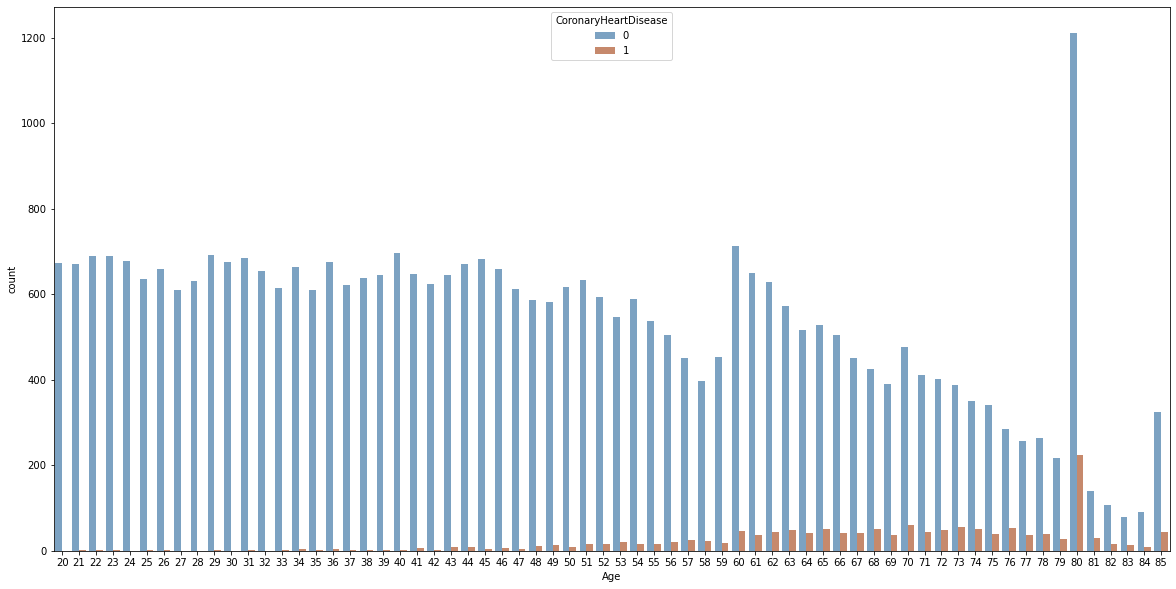

In [204]:
%%time
plt.figure(figsize=(20,10))
sns.countplot(x=df['Age'],data=df,hue='CoronaryHeartDisease',palette="twilight_shifted",saturation=2,dodge=True,)

#plt.savefig("Target&age.png")

Wall time: 2.18 s


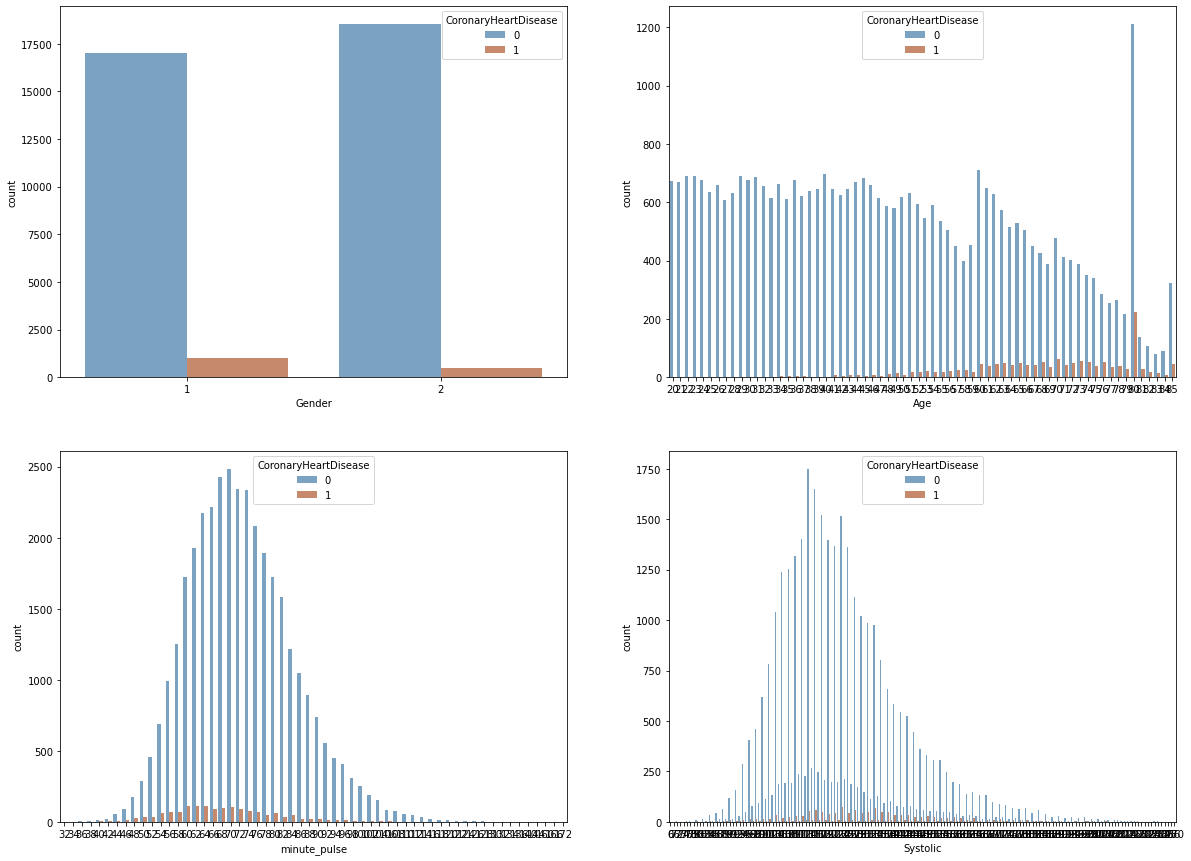

In [150]:
%%time
list = ['Gender', 'Age', 'minute_pulse', 'Systolic']
m=1
plt.figure(figsize=(20,15))
for i in list:
    plt.subplot(2,2,m)
    sns.countplot(x=i,data=df,hue='CoronaryHeartDisease',palette="twilight_shifted",
    saturation=2,dodge=True)
    m+=1
    
#plt.savefig("TargetRelation.png")

Wall time: 27.4 s


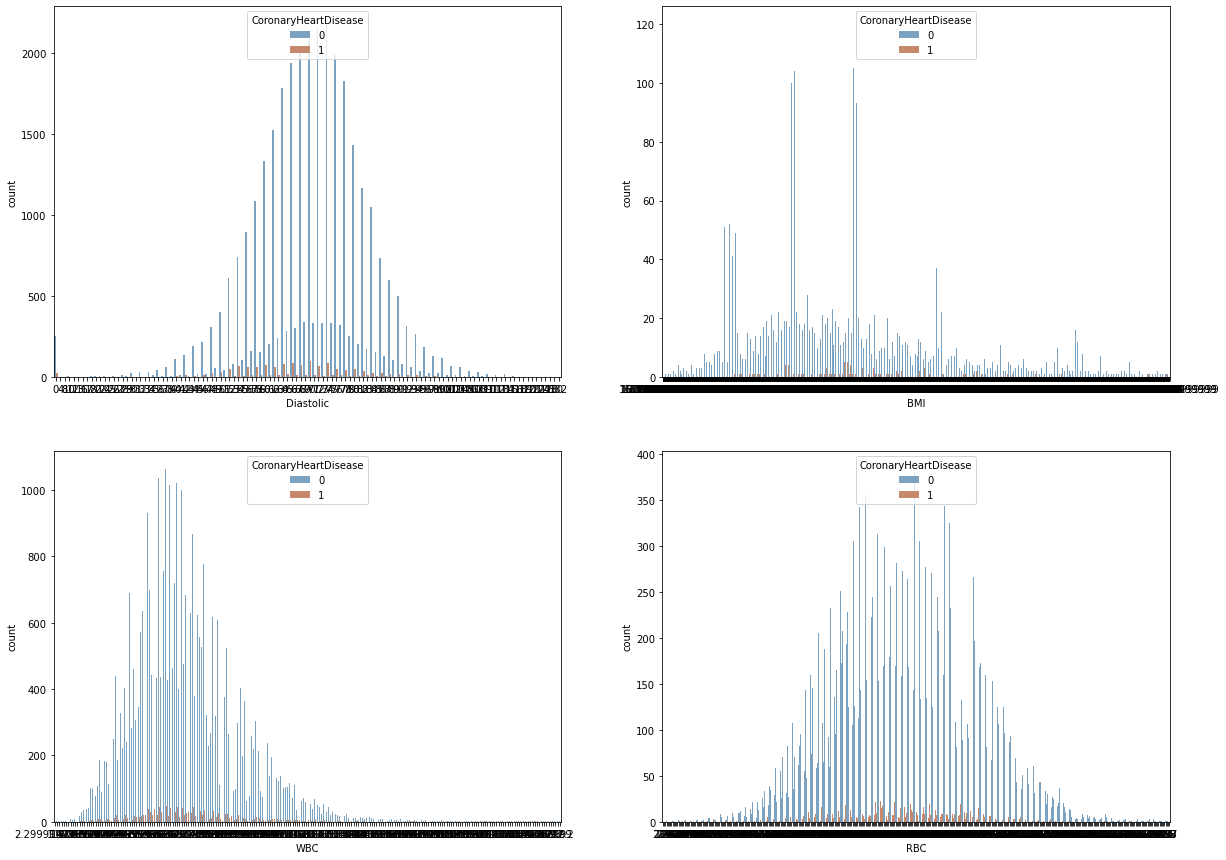

In [151]:
%%time
list = ['Diastolic','BMI', 'WBC', 'RBC']
m=1
plt.figure(figsize=(20,15))
for i in list:
    plt.subplot(2,2,m)
    sns.countplot(x=i,data=df,hue='CoronaryHeartDisease',palette="twilight_shifted",
    saturation=2,dodge=True)
    m+=1
    
#plt.savefig("TargetRelation.png")

Wall time: 6.6 s


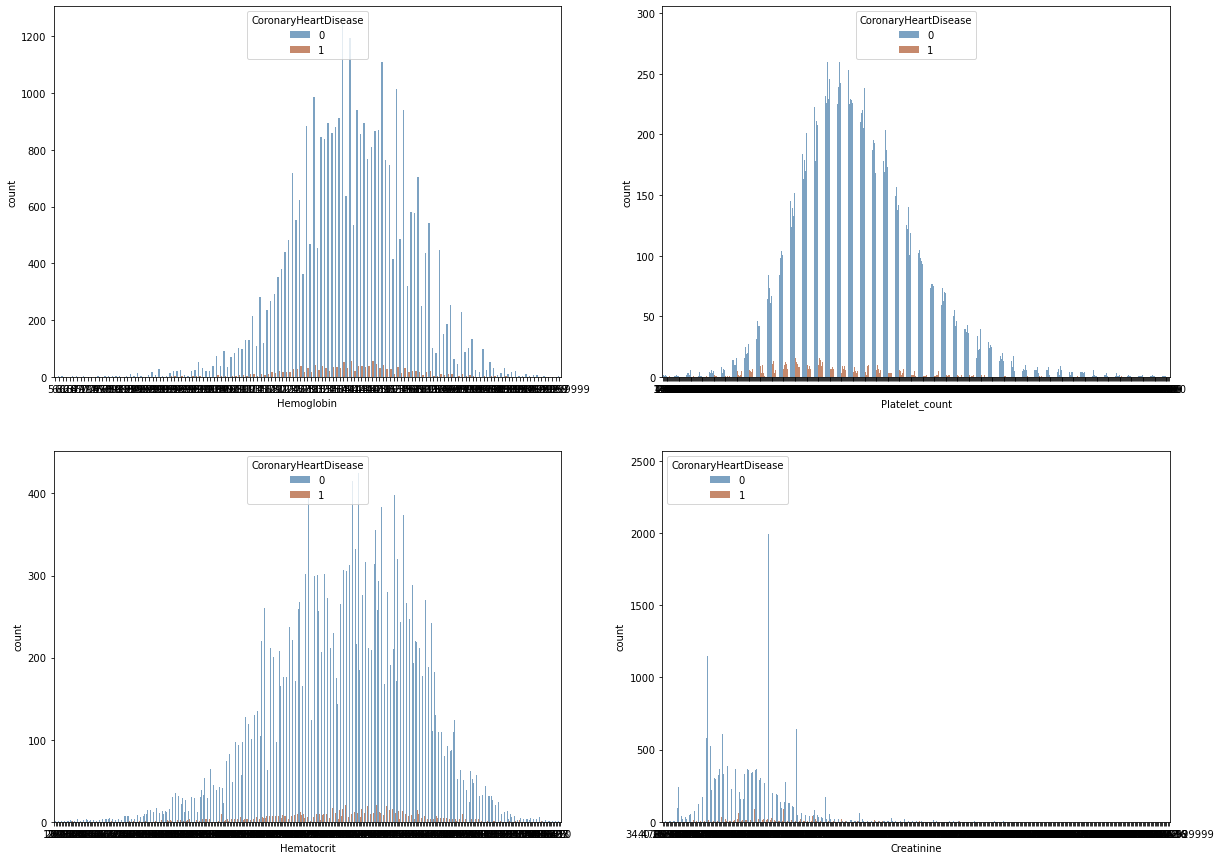

In [152]:
%%time
list = ['Hemoglobin','Platelet_count', 'Hematocrit', 'Creatinine']
m=1
plt.figure(figsize=(20,15))
for i in list:
    plt.subplot(2,2,m)
    sns.countplot(x=i,data=df,hue='CoronaryHeartDisease',palette="twilight_shifted",
    saturation=2,dodge=True)
    m+=1
    
#plt.savefig("TargetRelation.png")

Wall time: 8.45 s


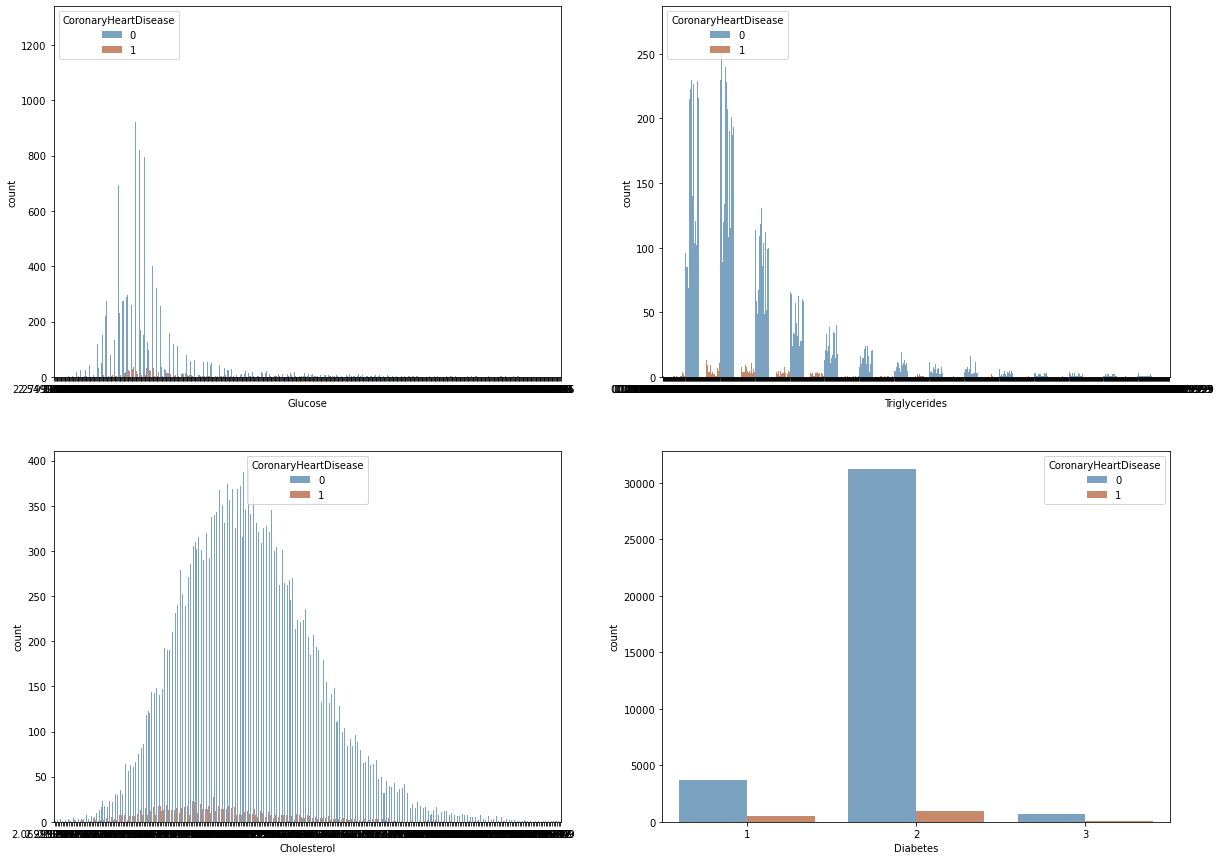

In [153]:
%%time
list = ['Glucose','Triglycerides', 'Cholesterol', 'Diabetes']
m=1
plt.figure(figsize=(20,15))
for i in list:
    plt.subplot(2,2,m)
    sns.countplot(x=i,data=df,hue='CoronaryHeartDisease',palette="twilight_shifted",
    saturation=2,dodge=True)
    m+=1
    
#plt.savefig("TargetRelation.png")

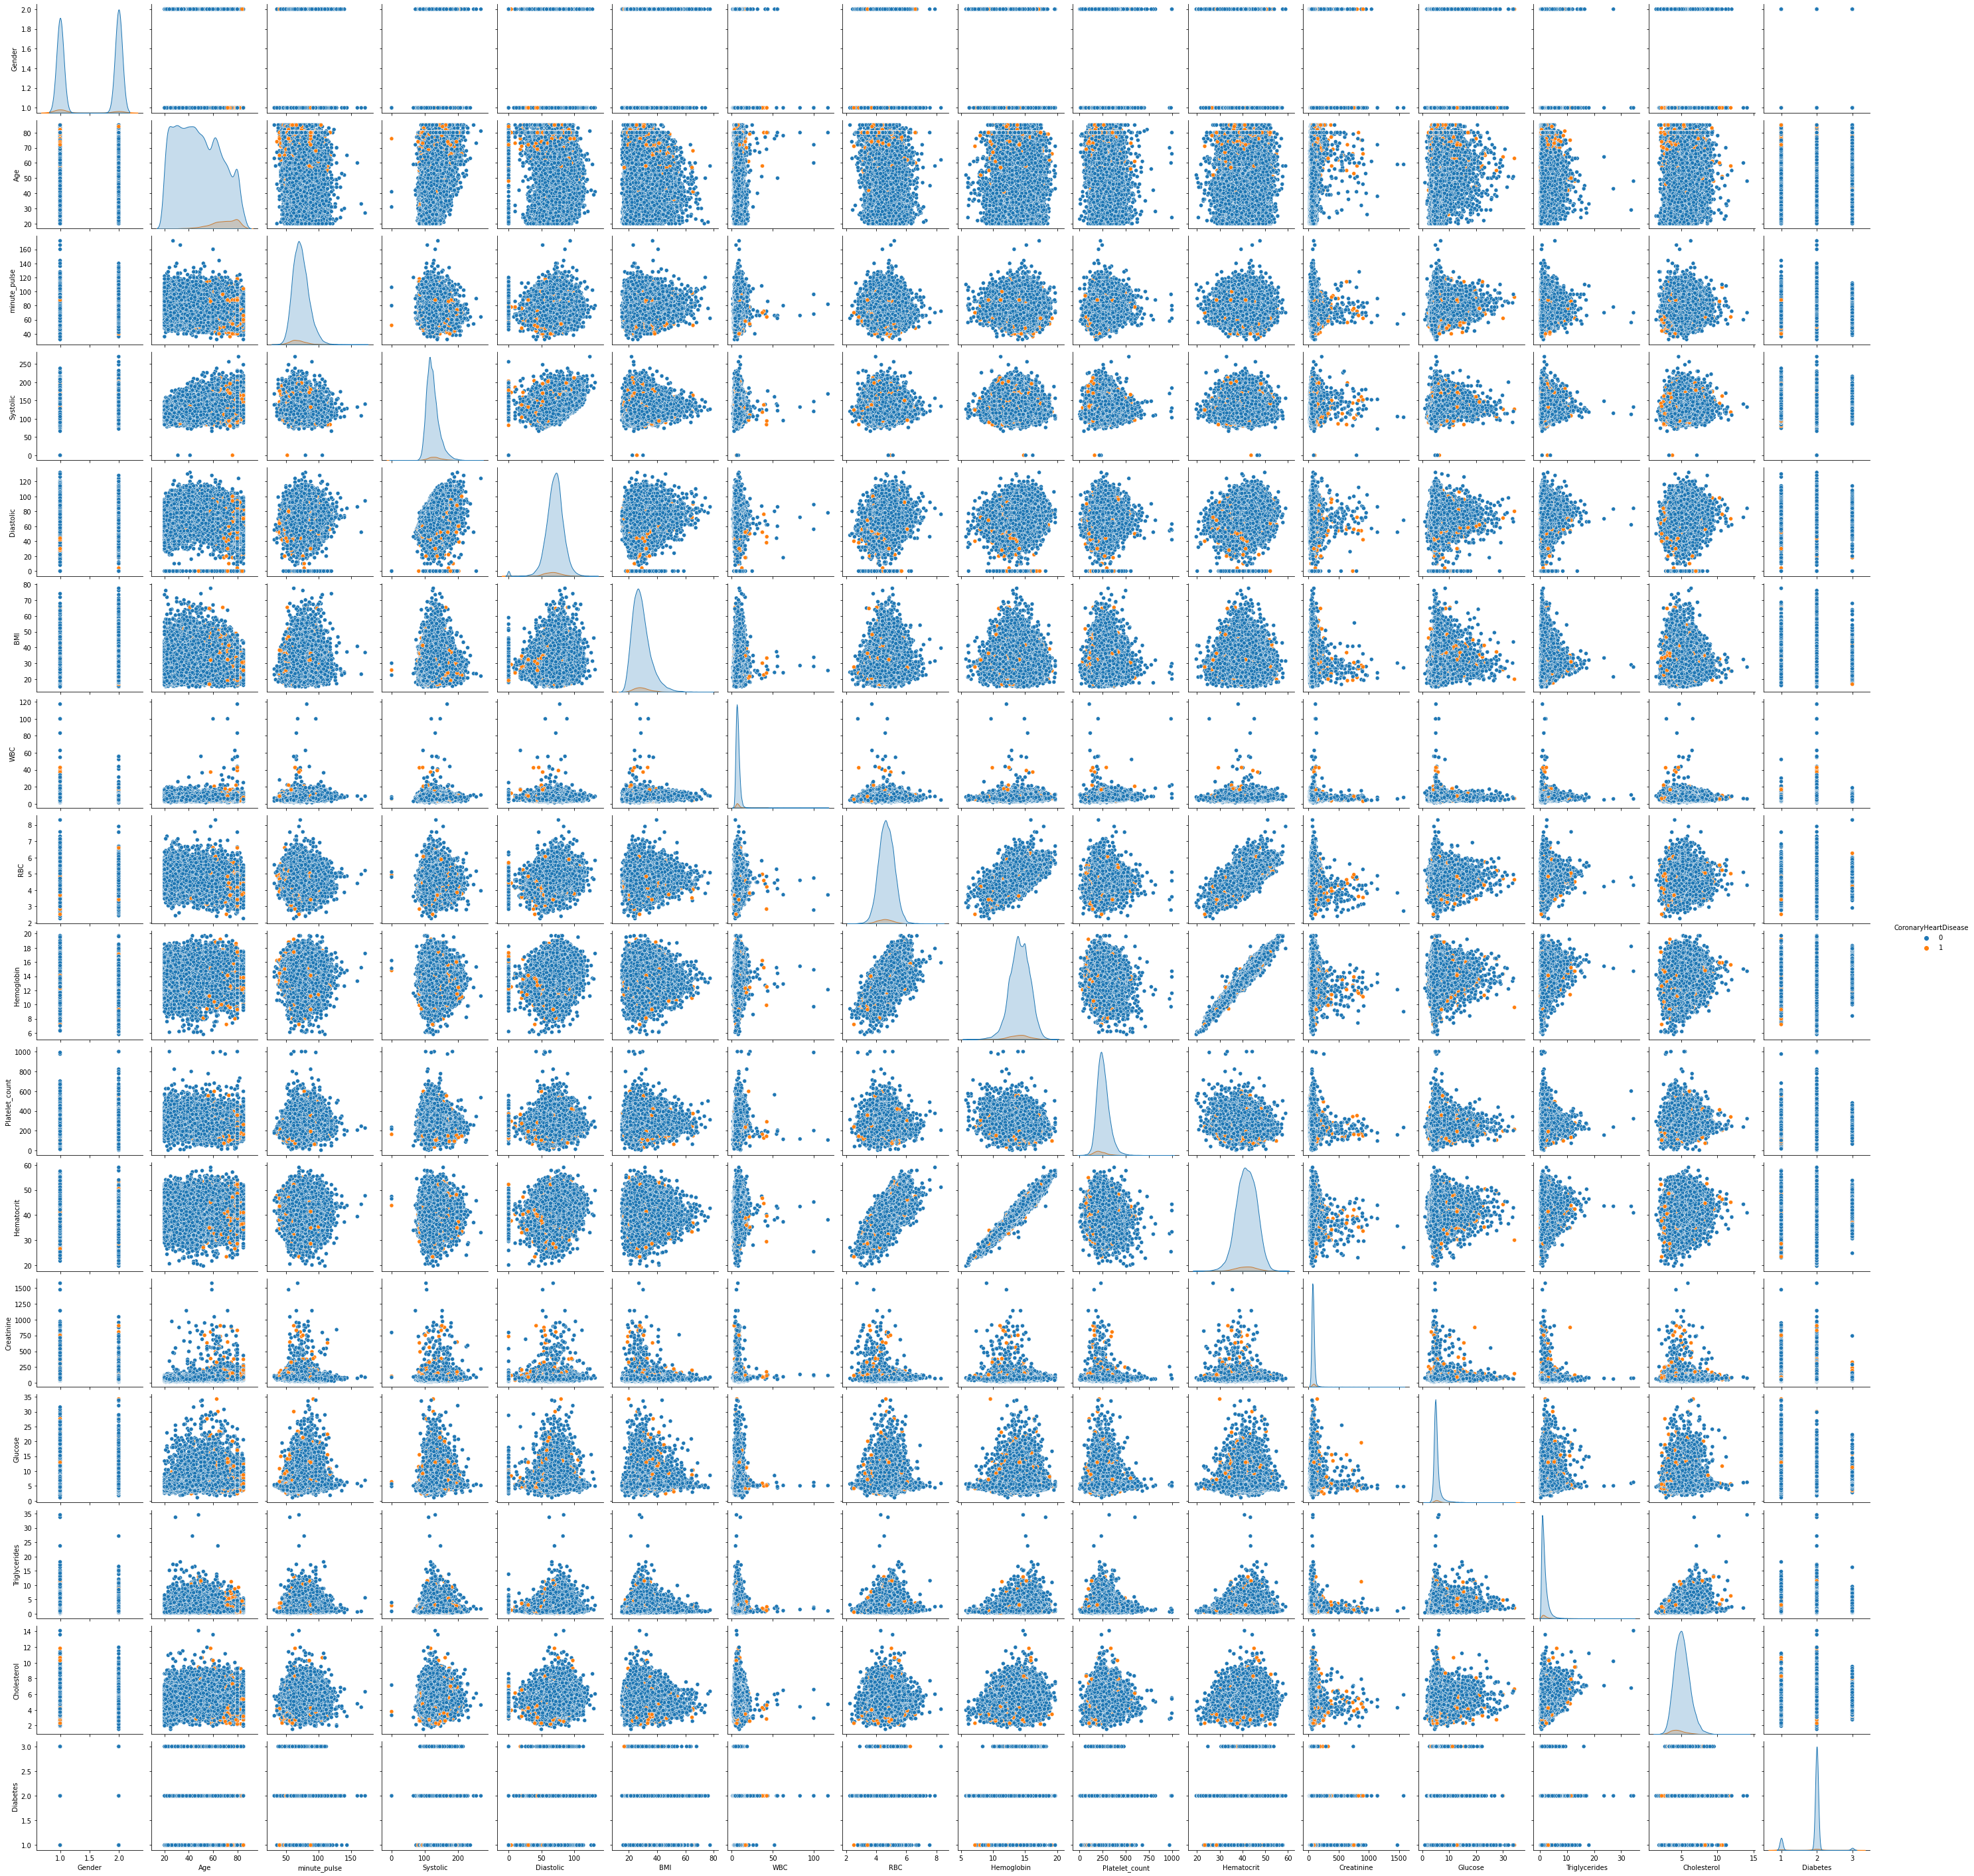

Wall time: 10min 26s


In [154]:
%%time

# pair-plot
sns.pairplot(df, vars = ['Gender', 'Age', 'minute_pulse', 'Systolic', 'Diastolic',
       'BMI', 'WBC', 'RBC', 'Hemoglobin',
       'Platelet_count', 'Hematocrit', 'Creatinine', 'Glucose',
       'Triglycerides', 'Cholesterol', 'Diabetes'], hue = 'CoronaryHeartDisease')
plt.show()

In [205]:
#only  +ve target dataset
#%%time
onlypositive = df.drop(df[df['CoronaryHeartDisease'] == 0].index)
#onlypositive.head(20)

In [206]:
#dividing dastaset according to age - below 40 and above 40
belowforty = df.drop(df[df['Age']>40].index)
aboveforty = df.drop(df[df['Age']<=40].index)
#aboveforty.head(20)
#belowforty.head(20)

In [207]:
#gender seperation into different dataset based on gender
onlymale = df.drop(df[df['Gender']==2].index)
onlyfemale = df.drop(df[df['Gender']==1].index)
#onlymale.head(20)
#onlyfemale.head(20)

In [208]:
# y includes our labels and x includes our features
y = df.CoronaryHeartDisease                          # 0 or 1 
list = ['CoronaryHeartDisease']
x = df.drop(list,axis = 1 )
x.head()

Gender  Age  minute_pulse  Systolic  Diastolic    BMI   WBC   RBC  \
0       1   77            68        98         56  24.90   7.6  4.73   
1       1   49            66       122         83  29.10   5.9  5.13   
2       1   37            64       174         99  30.62  10.2  5.76   
3       1   70           102       130         66  25.57  11.6  5.53   
4       1   81            72       136         61  27.33   9.1  5.32   

   Hemoglobin  Platelet_count  Hematocrit  Creatinine  Glucose  Triglycerides  \
0        14.1           214.0        41.8        61.9    4.330          1.298   
1        14.5           209.0        43.6        70.7    5.273          3.850   
2        16.0           357.0        48.1        88.4    4.163          1.581   
3        16.8           228.0        50.4        61.9    7.882          3.635   
4        16.6           160.0        48.1        88.4    6.384          0.756   

   Cholesterol  Diabetes  
0         5.56         2  
1         7.21         2  
2         4.03         2  
3         8.12         1  
4         4.50         2

In order to visualizate data we are going to use seaborn plots. We are not selecting feature.
Before ploting we need to normalization or standirdization. Because differences between values of features are very high to observe on plot.

Wall time: 2.91 s


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'minute_pulse'),
  Text(3, 0, 'Systolic'),
  Text(4, 0, 'Diastolic'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'WBC'),
  Text(7, 0, 'RBC'),
  Text(8, 0, 'Hemoglobin'),
  Text(9, 0, 'Platelet_count'),
  Text(10, 0, 'Hematocrit'),
  Text(11, 0, 'Creatinine'),
  Text(12, 0, 'Glucose'),
  Text(13, 0, 'Triglycerides'),
  Text(14, 0, 'Cholesterol')])

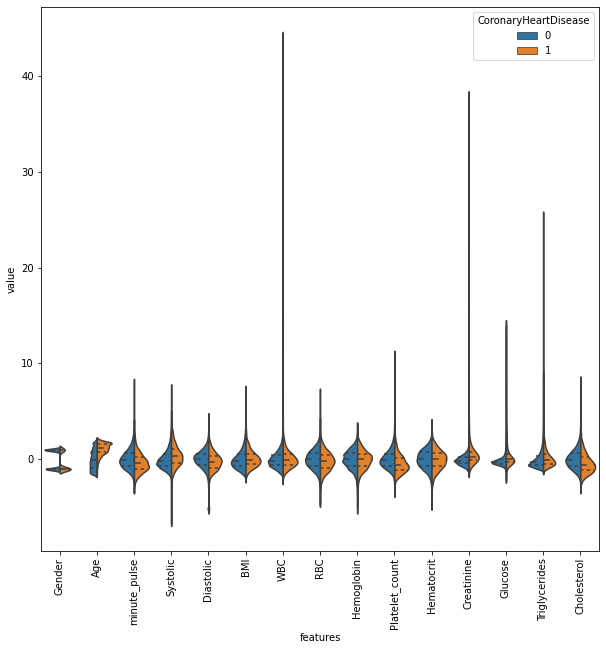

In [159]:
%%time
# all features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="CoronaryHeartDisease",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="CoronaryHeartDisease", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [209]:
# %%time
# sns.set(style="whitegrid", palette="muted")
# data_dia = y
# data = x
# data_n_2 = (data - data.mean()) / (data.std())              # standardization
# data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
# data = pd.melt(data,id_vars="CoronaryHeartDisease",
#                     var_name="features",
#                     value_name='value')
# plt.figure(figsize=(10,10))
# tic = time.time()
# sns.swarmplot(x="features", y="value", hue="CoronaryHeartDisease", data=data)
# 
# plt.xticks(rotation=90)

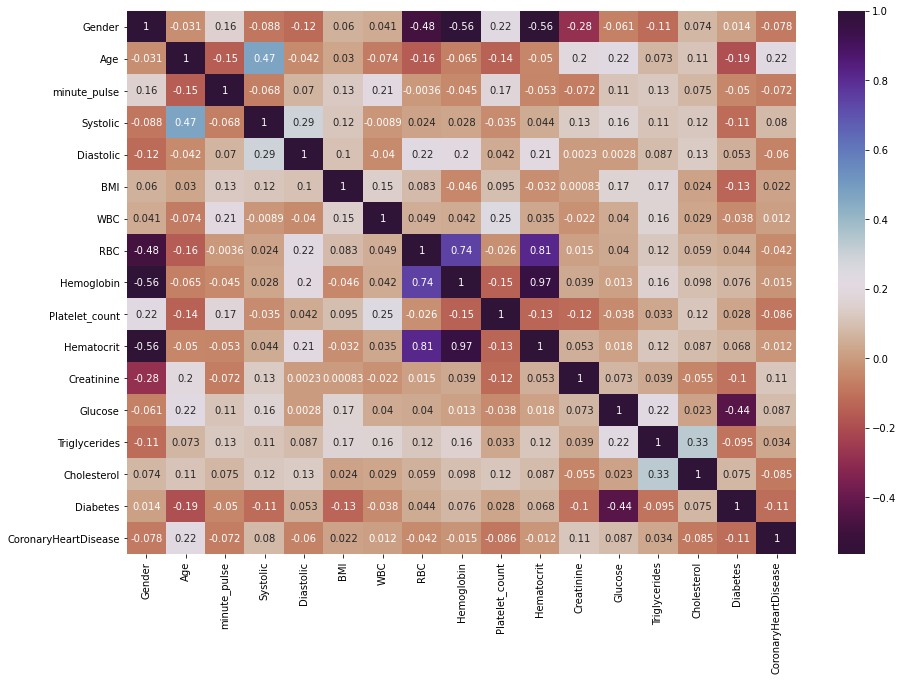

In [210]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar = True, annot =True,cmap='twilight_shifted_r');
#plt.savefig("heatmap.png")

# Feature Selection

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection.

#### 1) Feature selection with correlation and random forest classification
As it can be seen in map heat figure Hematocrite and Hemoglobin are correlated with each other so we will use only Hemoglobin. If you ask how we choose Hemoglobin as a feature to use, well actually there is no correct answer, we cannot make exact separation among other correlated features without trying. 
Here we use random forest classification in order to train our model and predict.So lets find other correlated features and look accuracy with random forest classifier.

In [211]:
drop_list1 = ['Hematocrit']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

Gender  Age  minute_pulse  Systolic  Diastolic    BMI   WBC   RBC  \
0       1   77            68        98         56  24.90   7.6  4.73   
1       1   49            66       122         83  29.10   5.9  5.13   
2       1   37            64       174         99  30.62  10.2  5.76   
3       1   70           102       130         66  25.57  11.6  5.53   
4       1   81            72       136         61  27.33   9.1  5.32   

   Hemoglobin  Platelet_count  Creatinine  Glucose  Triglycerides  \
0        14.1           214.0        61.9    4.330          1.298   
1        14.5           209.0        70.7    5.273          3.850   
2        16.0           357.0        88.4    4.163          1.581   
3        16.8           228.0        61.9    7.882          3.635   
4        16.6           160.0        88.4    6.384          0.756   

   Cholesterol  Diabetes  
0         5.56         2  
1         7.21         2  
2         4.03         2  
3         8.12         1  
4         4.50         2

After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.7 but lets see together what happen if we do not drop it.

<AxesSubplot:>

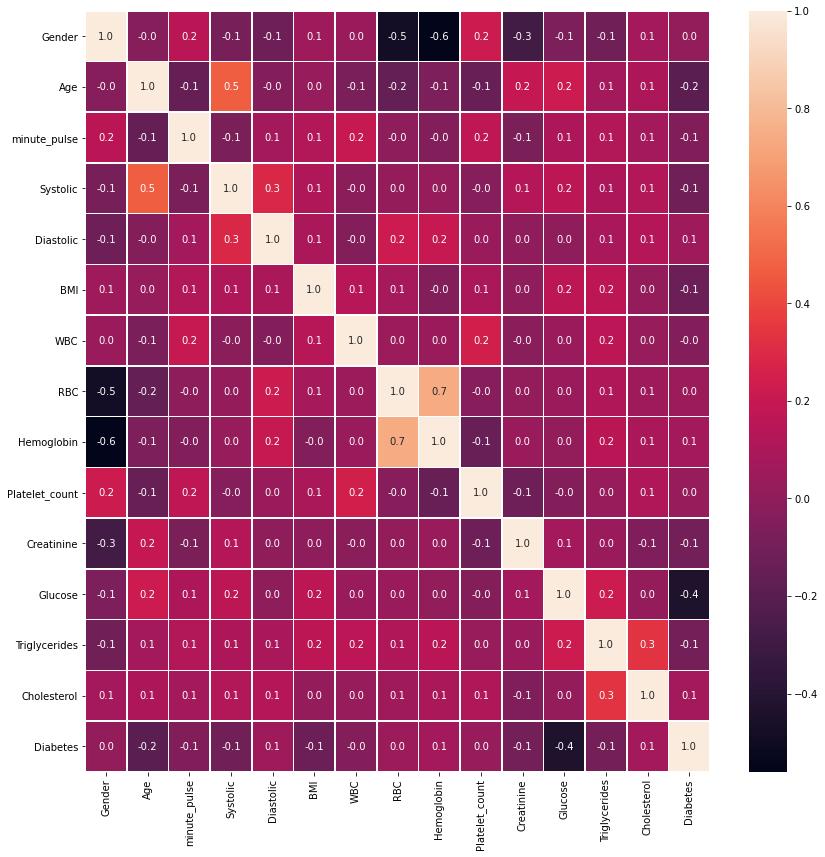

In [212]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we choose our features but did we choose correctly ? Lets use random forest and find accuracy according to chosen features.

Accuracy is:  0.9586330935251799


<AxesSubplot:>

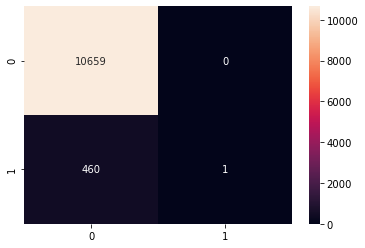

In [213]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other feature selection methods to find better results.

#### 2) Univariate feature selection and random forest classification
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. lets try for all combinations  first then, choose k = 5 and find best 5 features.

#### All Features

Scores  Importance (%)
Feature                                     
Age             12184.708738          42.864
Creatinine       9450.361797          33.245
Platelet_count   4913.514235          17.285
Systolic          713.181133           2.509
minute_pulse      391.576373           1.378
Diastolic         352.129432           1.239
Glucose           211.528562           0.744
Cholesterol        60.590167           0.213
Triglycerides      41.979163           0.148
Gender             37.600317           0.132
Diabetes           29.694875           0.104
BMI                28.002813           0.099
WBC                 4.211705           0.015
RBC                 3.558884           0.013
Hematocrit          2.285978           0.008
Hemoglobin          1.447083           0.005

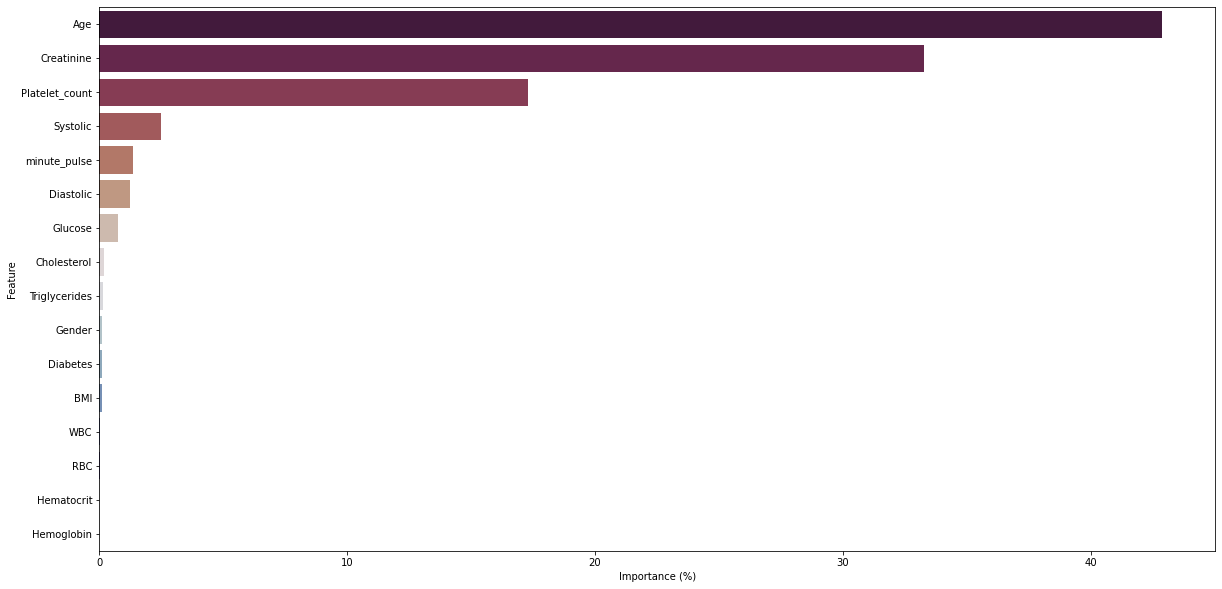

In [214]:
X = df.drop('CoronaryHeartDisease',axis=1)
Y = df['CoronaryHeartDisease']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(20,10))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
#plt.savefig("FeatureImportance.png")

#### Below 40 Age Feature 

In [215]:
# %%time
# #below forty age feature imp
# X = belowforty.drop('CoronaryHeartDisease',axis=1)
# Y = belowforty['CoronaryHeartDisease']
# from sklearn.feature_selection import SelectKBest, chi2
# fs = SelectKBest(score_func=chi2, k='all')
# fs.fit(X, Y)
# per = []
# for i in fs.scores_:
#     per.append(round(((i/sum(fs.scores_))*100),3))
# 
# features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)
# 
# plt.figure(figsize=(20,10))
# sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
# insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
# features_data = features_data.set_index('Feature')
# features_data
# plt.savefig("FeatureImportance.png")

#### Above 40 Age Feature

In [216]:
# %%time
#  above forty age feature imp
#  X = aboveforty.drop('CoronaryHeartDisease',axis=1)
#  Y = aboveforty['CoronaryHeartDisease']
#  from sklearn.feature_selection import SelectKBest, chi2
#  fs = SelectKBest(score_func=chi2, k='all')
#  fs.fit(X, Y)
#  per = []
#  for i in fs.scores_:
#      per.append(round(((i/sum(fs.scores_))*100),3))
#  
#  features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)
#  
#  plt.figure(figsize=(20,10))
#  sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
#  insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
#  features_data = features_data.set_index('Feature')
#  features_data
#  plt.savefig("FeatureImportance.png")

#### Only Male Feature

In [217]:
# %%time
# only male feature imp

# X = onlymale.drop('CoronaryHeartDisease',axis=1)
# Y = onlymale['CoronaryHeartDisease']
# from sklearn.feature_selection import SelectKBest, chi2
# fs = SelectKBest(score_func=chi2, k='all')
# fs.fit(X, Y)
# per = []
# for i in fs.scores_:
#     per.append(round(((i/sum(fs.scores_))*100),3))
# 
# features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)
# 
# plt.figure(figsize=(20,10))
# sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
# insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
# features_data = features_data.set_index('Feature')
# features_data
# plt.savefig("FeatureImportance.png")

#### Only Female Feature

In [218]:
# %%time
# only female feature imp
# X = onlyfemale.drop('CoronaryHeartDisease',axis=1)
# Y = onlyfemale['CoronaryHeartDisease']
# from sklearn.feature_selection import SelectKBest, chi2
# fs = SelectKBest(score_func=chi2, k='all')
# fs.fit(X, Y)
# per = []
# for i in fs.scores_:
#     per.append(round(((i/sum(fs.scores_))*100),3))
# 
# features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)
# 
# plt.figure(figsize=(20,10))
# sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
# insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
# features_data = features_data.set_index('Feature')
# features_data
# plt.savefig("FeatureImportance.png")

#### 5 Best Features

In [219]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3)

In [220]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [2.85871841e+01 8.36471789e+03 2.80451495e+02 4.96377011e+02
 2.66903402e+02 1.62762122e+01 3.01797163e+00 2.23869398e+00
 4.09229293e-01 3.21937694e+03 5.47338763e+03 1.47766925e+02
 3.38715860e+01 3.98189688e+01 1.89165846e+01]
Feature list: Index(['Gender', 'Age', 'minute_pulse', 'Systolic', 'Diastolic', 'BMI', 'WBC',
       'RBC', 'Hemoglobin', 'Platelet_count', 'Creatinine', 'Glucose',
       'Triglycerides', 'Cholesterol', 'Diabetes'],
      dtype='object')


<AxesSubplot:xlabel='Importance (%)', ylabel='Feature'>

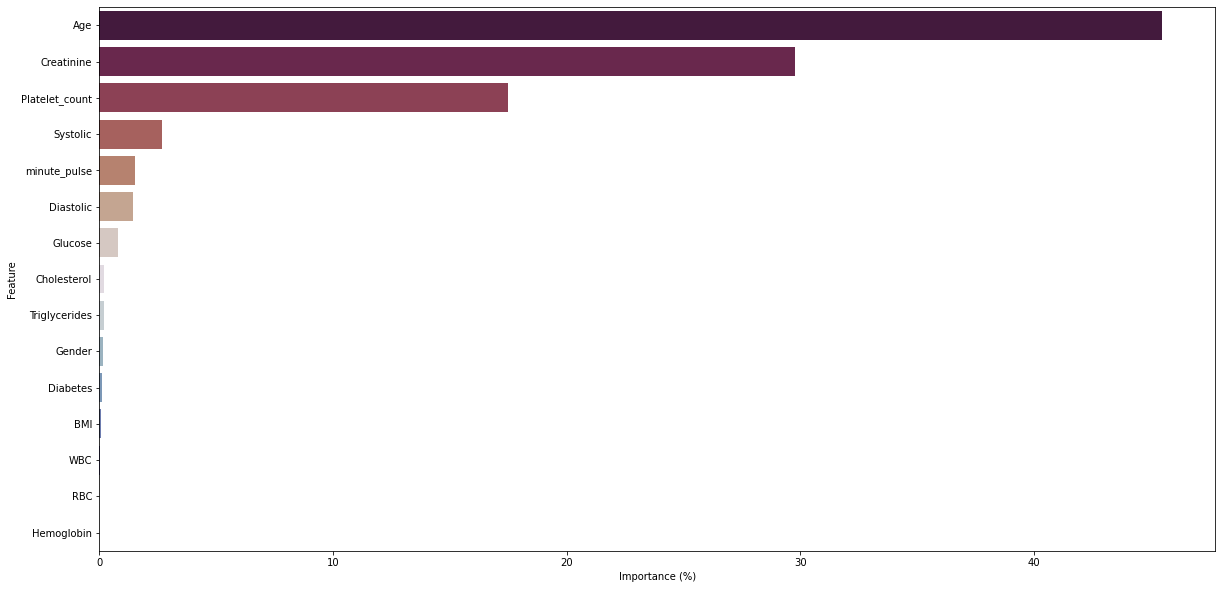

In [221]:
per = []
for i in select_feature.scores_:
    per.append(round(((i/sum(select_feature.scores_))*100),3))


features_data = pd.DataFrame({'Feature':x_train.columns,'Scores':select_feature.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)


plt.figure(figsize=(20,10))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')

Best 5 feature to classify is age, creatinine, platelete count, systolic, min pulse. So lets find out what happens if we use only these best scored 5 feature.

Accuracy is:  0.9589928057553957


<AxesSubplot:>

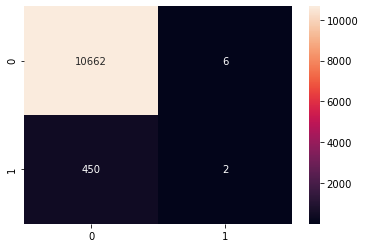

In [222]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is still almost 95% and as it can be seen in confusion matrix, we made the no of wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar. Now lets see other feature selection methods to find better results.

#### 3) Recursive feature elimination (RFE) with random forest
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.

In [223]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3)

In [224]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=7, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 7 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 7 feature by rfe: Index(['Age', 'BMI', 'Platelet_count', 'Creatinine', 'Glucose',
       'Triglycerides', 'Cholesterol'],
      dtype='object')


Chosen 7 best features by rfe is Age', 'BMI', 'Platelet_count', 'Hematocrit', 'Creatinine',
       'Triglycerides', 'Cholesterol'. They are not similar with previous (selectkBest) method. 


Accuracy is:  0.9608812949640287


<AxesSubplot:>

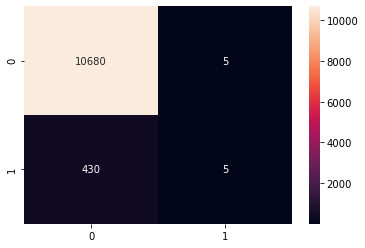

In [225]:
ac_3 = accuracy_score(y_test,rfe.predict(x_test))
print('Accuracy is: ',ac_3)
cm_3 = confusion_matrix(y_test,rfe.predict(x_test))
sns.heatmap(cm_3,annot=True,fmt="d")

As you can see there is a problem, okey I except we find best 5 feature with two different method and these features are same but why it is 5. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

#### 4) Recursive feature elimination with cross validation and random forest classification
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html Now we will not only find best features but we also find how many features do we need for best accuracy.

In [226]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3)

In [227]:
%%time

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['Age', 'minute_pulse', 'Systolic', 'Diastolic', 'BMI', 'WBC', 'RBC',
       'Hemoglobin', 'Platelet_count', 'Creatinine', 'Glucose',
       'Triglycerides', 'Cholesterol', 'Diabetes'],
      dtype='object')
Wall time: 4min 17s


Finally, we find best " " features that are 'Age', 'minute_pulse', 'Systolic', 'Diastolic', 'BMI', 'WBC', 'RBC','Hemoglobin', 'Platelet_count', 'Creatinine', 'Glucose', 'Triglycerides', 'Cholesterol', 'Diabetes' for best classification. Lets look at best accuracy with plot.

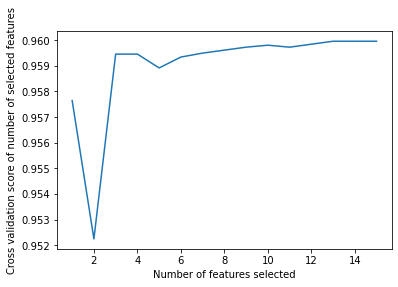

In [228]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### 5) Tree based feature selection and random forest classification
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

In [229]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3)

Feature ranking:
1. feature 1 (0.097026)
2. feature 13 (0.096234)
3. feature 10 (0.085611)
4. feature 9 (0.079967)
5. feature 12 (0.078312)
6. feature 5 (0.075206)
7. feature 11 (0.073236)
8. feature 7 (0.069872)
9. feature 3 (0.067100)
10. feature 6 (0.066634)
11. feature 8 (0.063448)
12. feature 2 (0.062190)
13. feature 4 (0.058346)
14. feature 14 (0.016068)
15. feature 0 (0.010750)


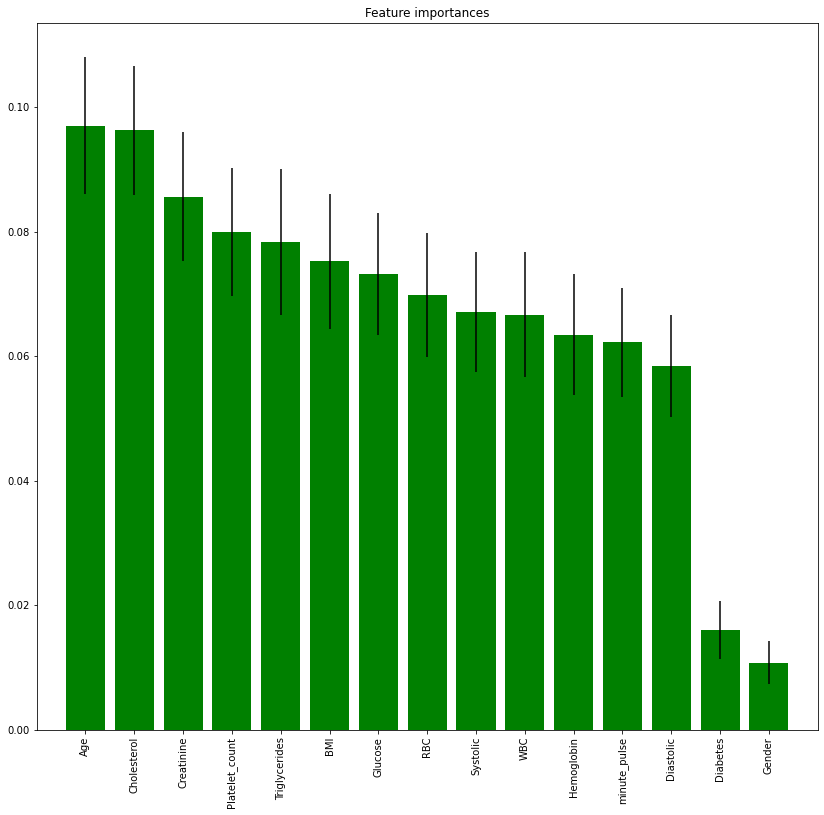

In [230]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

##  Analysis After Feature Selection

In [231]:
#df.head()
todrop2 = ['Gender', 'minute_pulse','Diastolic','WBC','RBC','Hemoglobin','Hematocrit', 'Diabetes']
selectedfeature = df.drop(todrop2, axis=1)
selectedfeature.head(10)

Age  Systolic    BMI  Platelet_count  Creatinine  Glucose  Triglycerides  \
0   77        98  24.90           214.0        61.9    4.330          1.298   
1   49       122  29.10           209.0        70.7    5.273          3.850   
2   37       174  30.62           357.0        88.4    4.163          1.581   
3   70       130  25.57           228.0        61.9    7.882          3.635   
4   81       136  27.33           160.0        88.4    6.384          0.756   
5   38       109  26.68           255.0        53.0    5.162          0.756   
6   85       139  19.96           219.0        79.6    4.163          0.474   
7   23       103  23.68           220.0        26.5    4.774          1.242   
8   53       114  25.93           331.0        53.0    4.718          0.847   
9   42       119  37.60           337.0        44.2    5.273          2.077   

   Cholesterol  CoronaryHeartDisease  
0         5.56                     0  
1         7.21                     0  
2         4.03                     0  
3         8.12                     0  
4         4.50                     0  
5         5.15                     0  
6         4.24                     0  
7         3.75                     0  
8         5.66                     0  
9         4.11                     0

In [232]:
selectedfeature.shape

(37064, 9)

In [233]:
selectedfeature.columns

Index(['Age', 'Systolic', 'BMI', 'Platelet_count', 'Creatinine', 'Glucose',
       'Triglycerides', 'Cholesterol', 'CoronaryHeartDisease'],
      dtype='object')

<AxesSubplot:>

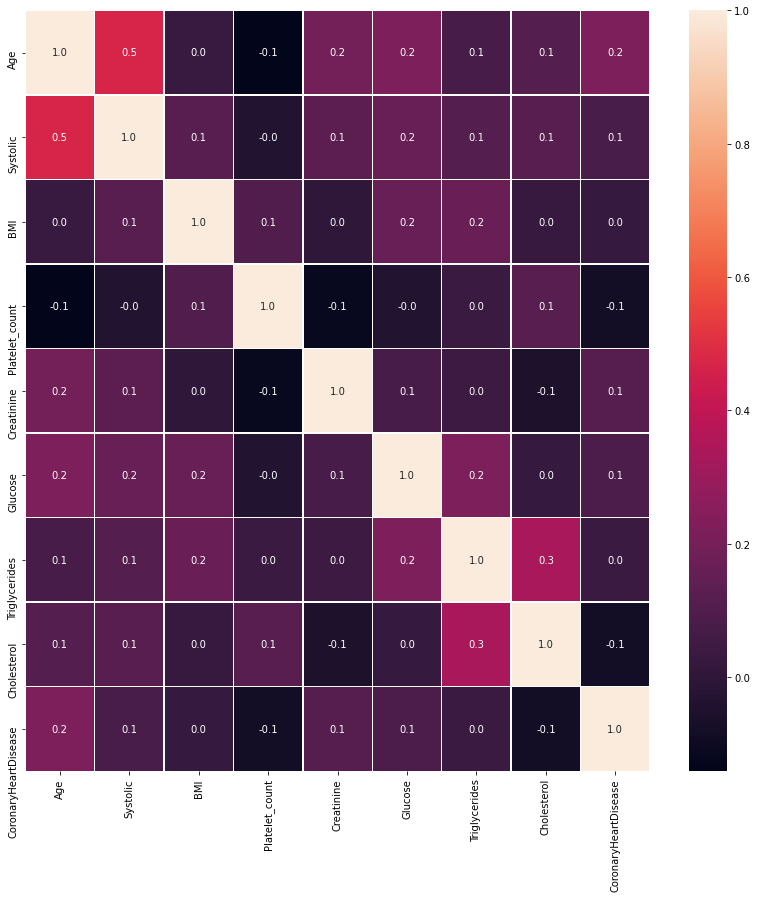

In [234]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(selectedfeature.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Wall time: 32 s


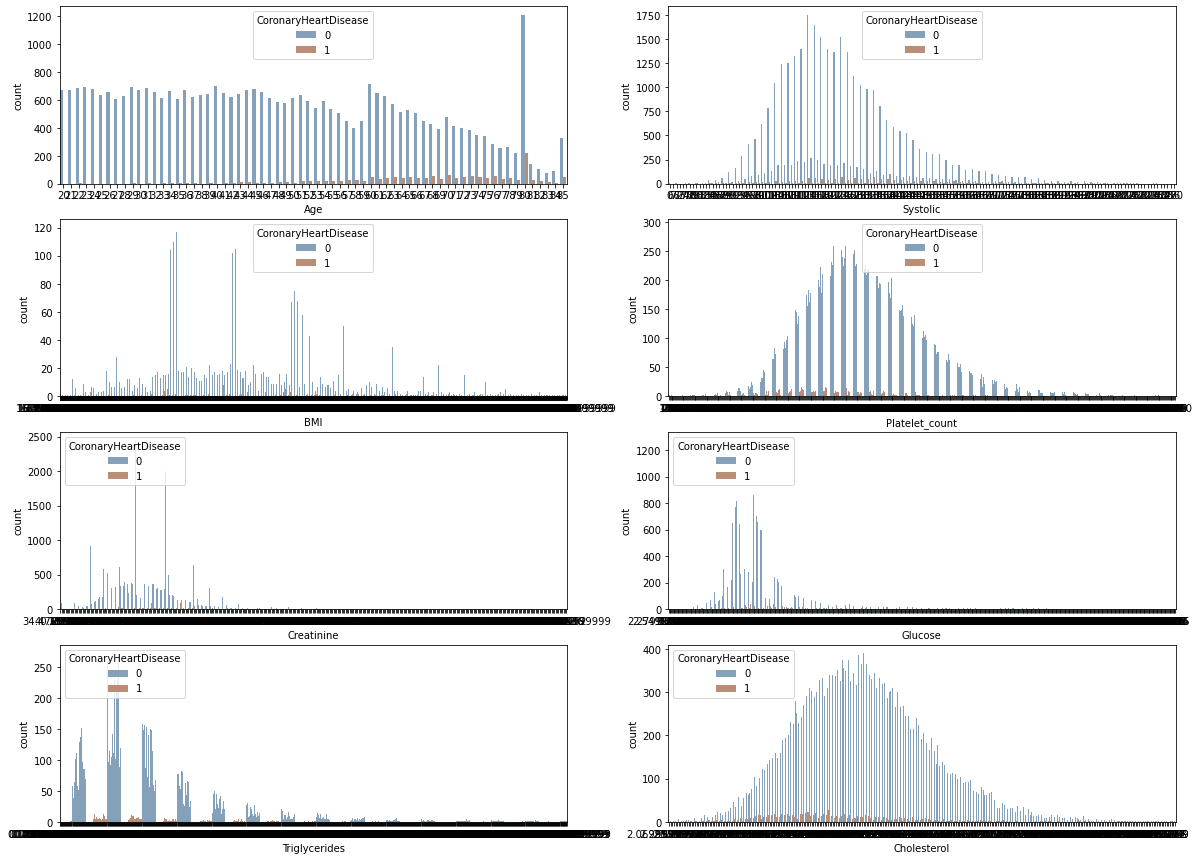

In [235]:
%%time
list = ['Age', 'Systolic', 'BMI', 'Platelet_count', 'Creatinine', 'Glucose',
       'Triglycerides', 'Cholesterol']
m=1
plt.figure(figsize=(20,15))
for i in list:
    plt.subplot(4,2,m)
    sns.countplot(x=i,data=selectedfeature,hue='CoronaryHeartDisease',palette="twilight_shifted",dodge=True)
    m+=1
    
#plt.savefig("TargetRelation.png")

In [236]:
todrop2 = ['Gender', 'minute_pulse', 'Diastolic', 'WBC',
       'RBC', 'Hemoglobin', 'Hematocrit', 'Diabetes']
df.drop(todrop2, inplace=True, axis=1)
df.head(10)

Age  Systolic    BMI  Platelet_count  Creatinine  Glucose  Triglycerides  \
0   77        98  24.90           214.0        61.9    4.330          1.298   
1   49       122  29.10           209.0        70.7    5.273          3.850   
2   37       174  30.62           357.0        88.4    4.163          1.581   
3   70       130  25.57           228.0        61.9    7.882          3.635   
4   81       136  27.33           160.0        88.4    6.384          0.756   
5   38       109  26.68           255.0        53.0    5.162          0.756   
6   85       139  19.96           219.0        79.6    4.163          0.474   
7   23       103  23.68           220.0        26.5    4.774          1.242   
8   53       114  25.93           331.0        53.0    4.718          0.847   
9   42       119  37.60           337.0        44.2    5.273          2.077   

   Cholesterol  CoronaryHeartDisease  
0         5.56                     0  
1         7.21                     0  
2         4.03                     0  
3         8.12                     0  
4         4.50                     0  
5         5.15                     0  
6         4.24                     0  
7         3.75                     0  
8         5.66                     0  
9         4.11                     0

In [237]:
df.shape

(37064, 9)

In [238]:
# y includes our labels and x includes our features
# y = df.CoronaryHeartDisease                          # 0 or 1 
# list = ['CoronaryHeartDisease']
# x = df.drop(list,axis = 1 )
# x.head()

In [239]:
# %%time
# 
# # pair-plot
# sns.pairplot(df, vars = ['Age', 'minute_pulse', 'Systolic','BMI','Platelet_count','Creatinine', 'Glucose',
#        'Triglycerides', 'Cholesterol'], hue = 'CoronaryHeartDisease')
# plt.show()

In [240]:
# pip install graphviz

# Specify testing and training data 

In [241]:
testdf=pd.read_excel("testingdata.xlsx")
testdf.head()

SEQN  Gender  Age  Annual-Family-Income  Ratio-Family-Income-Poverty  \
0    46       2   85                     3                         1.20   
1   130       1   59                     6                         2.58   
2   239       2   69                    10                         5.00   
3   257       1   75                     6                         2.49   
4   274       2   69                     7                         3.73   

   X60-sec-pulse  Systolic  Diastolic  Weight  Height  ...  Total-Cholesterol  \
0             54       128         65   57.60   155.6  ...               4.84   
1             80       111         68   76.60   171.1  ...               4.50   
2             66       149         78   76.70   164.6  ...               5.15   
3             48       181         64   95.90   165.3  ...               4.86   
4             72       147         87   74.24   158.0  ...               4.45   

    HDL  Glycohemoglobin  Vigorous-work  Moderate-work  Health-Insurance  \
0  0.93              5.4              2              2                 1   
1  0.87              6.7              1              1                 1   
2  1.96              5.3              1              1                 1   
3  1.54              5.2              2              1                 1   
4  1.34              5.2              2              1                 1   

   Diabetes  Blood-Rel-Diabetes  Blood-Rel-Stroke  CoronaryHeartDisease  
0         3                   1                 2                     1  
1         1                   1                 1                     1  
2         2                   2                 2                     1  
3         2                   2                 2                     1  
4         1                   1                 2                     1  

[5 rows x 51 columns]

In [242]:
print("The Test DataFrame has", testdf.shape[0], "rows and", testdf.shape[1], "columns.")

The Test DataFrame has 3223 rows and 51 columns.


In [243]:
# classes are in target variable
testdf['CoronaryHeartDisease'].value_counts()

0    1715
1    1508
Name: CoronaryHeartDisease, dtype: int64

In [244]:
testdf.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [245]:
todrop3 = ['SEQN','Annual-Family-Income','Ratio-Family-Income-Poverty','HDL','Glycohemoglobin',
            'Lymphocyte','Monocyte','Eosinophils','Basophils','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.',
            'Mean-cell-Hemoglobin','Mean-Platelet-Vol','Segmented-Neutrophils','Red-Cell-Distribution-Width','Albumin',
           'ALP','AST','ALT','GGT','Iron','LDH','Phosphorus','Bilirubin','Protein','Uric.Acid','Cholesterol',
           'HDL','Glycohemoglobin','Vigorous-work','Moderate-work','Health-Insurance','Blood-Rel-Diabetes',
           'Blood-Rel-Stroke','Weight','Height']
testdf.drop(todrop3, inplace=True, axis=1)
testdf.head(10)
#df.tail(10)

Gender  Age  X60-sec-pulse  Systolic  Diastolic  Body-Mass-Index  \
0       2   85             54       128         65            23.79   
1       1   59             80       111         68            26.17   
2       2   69             66       149         78            28.31   
3       1   75             48       181         64            35.10   
4       2   69             72       147         87            29.74   
5       2   81             56       162         68            22.19   
6       1   70             68       136         78            27.94   
7       2   53             78       129         84            29.20   
8       1   59             70       118         68            26.65   
9       2   67             66       135         68            28.78   

   White-Blood-Cells  Red-Blood-Cells  Hemoglobin  Platelet-count  Hematocrit  \
0                6.5             4.88        13.6             197        43.8   
1                5.9             4.89        14.8             187        43.6   
2                5.7             4.31        13.4             247        40.5   
3                7.7             4.22        14.2             191        41.4   
4                4.4             4.34        13.4             209        40.1   
5                4.9             4.16        13.3             191        38.7   
6                7.5             5.02        13.7             285        41.6   
7                5.7             4.91        13.9             374        41.3   
8                7.0             4.71        14.7             221        44.0   
9               10.6             4.84        14.7             431        43.5   

   Creatinine  Glucose  Triglycerides  Total-Cholesterol  Diabetes  \
0       238.7    5.551          1.355               4.84         3   
1        70.7    5.884          1.682               4.50         1   
2        53.0    5.051          1.513               5.15         2   
3        88.4    5.051          0.994               4.86         2   
4        53.0    4.885          1.603               4.45         1   
5        61.9    4.607          1.219               4.73         2   
6        79.6    5.495          0.903               5.09         2   
7        53.0    5.051          1.535               6.72         2   
8        88.4    4.663          0.858               6.62         2   
9        35.4    6.495          5.622               6.00         1   

   CoronaryHeartDisease  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
5                     1  
6                     1  
7                     1  
8                     1  
9                     1

In [246]:
testdf.columns = ['Gender', 'Age', 'minute_pulse', 'Systolic', 'Diastolic',
       'BMI', 'WBC', 'RBC', 'Hemoglobin',
       'Platelet_count', 'Hematocrit', 'Creatinine', 'Glucose',
       'Triglycerides', 'Cholesterol', 'Diabetes',
       'CoronaryHeartDisease']

In [247]:
todrop4 = ['Gender', 'minute_pulse', 'Diastolic', 'WBC',
       'RBC', 'Hemoglobin', 'Hematocrit', 'Diabetes']
testdf.drop(todrop4, inplace=True, axis=1)
testdf.head(10)

Age  Systolic    BMI  Platelet_count  Creatinine  Glucose  Triglycerides  \
0   85       128  23.79             197       238.7    5.551          1.355   
1   59       111  26.17             187        70.7    5.884          1.682   
2   69       149  28.31             247        53.0    5.051          1.513   
3   75       181  35.10             191        88.4    5.051          0.994   
4   69       147  29.74             209        53.0    4.885          1.603   
5   81       162  22.19             191        61.9    4.607          1.219   
6   70       136  27.94             285        79.6    5.495          0.903   
7   53       129  29.20             374        53.0    5.051          1.535   
8   59       118  26.65             221        88.4    4.663          0.858   
9   67       135  28.78             431        35.4    6.495          5.622   

   Cholesterol  CoronaryHeartDisease  
0         4.84                     1  
1         4.50                     1  
2         5.15                     1  
3         4.86                     1  
4         4.45                     1  
5         4.73                     1  
6         5.09                     1  
7         6.72                     1  
8         6.62                     1  
9         6.00                     1

In [248]:
print("The Training DataFrame has", testdf.shape[0], "rows and", testdf.shape[1], "columns.")

The Training DataFrame has 3223 rows and 9 columns.


In [249]:
testdf.shape

(3223, 9)

In [250]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223 entries, 0 to 3222
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3223 non-null   int64  
 1   Systolic              3223 non-null   int64  
 2   BMI                   3223 non-null   float64
 3   Platelet_count        3223 non-null   int64  
 4   Creatinine            3223 non-null   float64
 5   Glucose               3223 non-null   float64
 6   Triglycerides         3223 non-null   float64
 7   Cholesterol           3223 non-null   float64
 8   CoronaryHeartDisease  3223 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 226.7 KB


In [251]:
# check if there is any missing data
testdf.isnull().sum()

Age                     0
Systolic                0
BMI                     0
Platelet_count          0
Creatinine              0
Glucose                 0
Triglycerides           0
Cholesterol             0
CoronaryHeartDisease    0
dtype: int64

In [252]:
testdf.isna().sum()

Age                     0
Systolic                0
BMI                     0
Platelet_count          0
Creatinine              0
Glucose                 0
Triglycerides           0
Cholesterol             0
CoronaryHeartDisease    0
dtype: int64

In [253]:
Duplicated=df.duplicated()
Duplicated2=pd.Series.to_frame(Duplicated)
Duplicated2.head()
print(Duplicated2.loc[Duplicated2.loc[:,0]==True])
testdf.loc[3222, :]
testdf.duplicated().sum()

Empty DataFrame
Columns: [0]
Index: []


0

In [254]:
# y includes our labels and x includes our features
y = testdf.CoronaryHeartDisease                          # 0 or 1 
list = ['CoronaryHeartDisease']
x = testdf.drop(list,axis = 1 )
x.head()

Age  Systolic    BMI  Platelet_count  Creatinine  Glucose  Triglycerides  \
0   85       128  23.79             197       238.7    5.551          1.355   
1   59       111  26.17             187        70.7    5.884          1.682   
2   69       149  28.31             247        53.0    5.051          1.513   
3   75       181  35.10             191        88.4    5.051          0.994   
4   69       147  29.74             209        53.0    4.885          1.603   

   Cholesterol  
0         4.84  
1         4.50  
2         5.15  
3         4.86  
4         4.45

# Model Training

## 1) Decision Tree

In [329]:
# Split the data - 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)

#Scale the X data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [330]:
%%time

# parameters candidates
parameters = {'max_depth':range(2,32)}

# fitting
DecisionTree_GSCV = GridSearchCV(DecisionTreeClassifier(random_state=8017),
                                 parameters, n_jobs=-1, verbose=3, return_train_score=True)
DecisionTree_GSCV.fit(x_train, y_train)
DecisionTree_model = DecisionTree_GSCV.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Wall time: 938 ms


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.8s finished


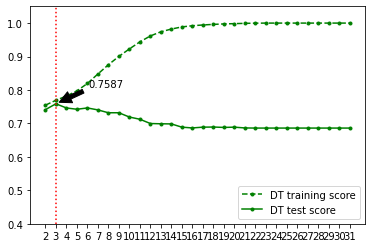

Wall time: 494 ms


In [331]:
%%time
# plot training & testing scores
train_dt_scores = DecisionTree_GSCV.cv_results_['mean_train_score']
test_dt_scores = DecisionTree_GSCV.cv_results_['mean_test_score']

plt.plot(train_dt_scores, "g.--")
plt.plot(test_dt_scores, "g.-")
plt.ylim(0.4, 1.05)
plt.xticks(range(30), range(2, 32))
plt.legend(["DT training score", "DT test score"])
plt.axvline(np.argmax(test_dt_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_dt_scores).round(4), (np.argmax(test_dt_scores), np.max(test_dt_scores)), xycoords="data",
                 xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [332]:
# accuracy scores
print(DecisionTree_model.get_params())
print(f"Training Score: {round(DecisionTree_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(DecisionTree_model.score(x_test, y_test),4)}")

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 8017, 'splitter': 'best'}
Training Score: 0.7676
Testing Score: 0.7674


<AxesSubplot:>

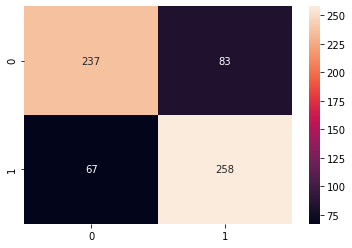

In [333]:
cm1 = confusion_matrix(y_test,DecisionTree_GSCV.predict(x_test))
sns.heatmap(cm1,annot=True,fmt="d")

In [334]:
print ('Accuracy Score is',accuracy_score(y_test,DecisionTree_GSCV.predict(x_test)))
print('AUC-ROC:',roc_auc_score(y_test,DecisionTree_GSCV.predict(x_test)))
print('LOGLOSS Value is',log_loss(y_test,DecisionTree_GSCV.predict(x_test)))
print ('Classification Report : ')
print (classification_report(y_test,DecisionTree_GSCV.predict(x_test)))

Accuracy Score is 0.7674418604651163
AUC-ROC: 0.767235576923077
LOGLOSS Value is 8.032376474144664
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       320
           1       0.76      0.79      0.77       325

    accuracy                           0.77       645
   macro avg       0.77      0.77      0.77       645
weighted avg       0.77      0.77      0.77       645



In [335]:
print ('Accuracy Score is',accuracy_score(y_test,DecisionTree_GSCV.predict(x_test)))
print("Precision score: {}".format(precision_score(y_test,DecisionTree_GSCV.predict(x_test))))
print("Recall score: {}".format(recall_score(y_test,DecisionTree_GSCV.predict(x_test))))
print("F1 Score: {}".format(f1_score(y_test,DecisionTree_GSCV.predict(x_test))))

Accuracy Score is 0.7674418604651163
Precision score: 0.7565982404692082
Recall score: 0.7938461538461539
F1 Score: 0.7747747747747747


## 2) Logistic Regression

In [336]:
%%time

# fitting
Logistic_model =  LogisticRegressionCV(Cs = 50, cv = 5, random_state=8017)
Logistic_model.fit(x_train, y_train)
print(Logistic_model.get_params())

{'Cs': 50, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 8017, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Wall time: 914 ms


In [337]:
# regularaization candidates
print('Candidates of Regularization Parameter C:')
print(Logistic_model.Cs_, '\n')

# accuracy scores
print(f"Training Score: {round(Logistic_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(Logistic_model.score(x_test, y_test),4)}")

Candidates of Regularization Parameter C:
[1.00000000e-04 1.45634848e-04 2.12095089e-04 3.08884360e-04
 4.49843267e-04 6.55128557e-04 9.54095476e-04 1.38949549e-03
 2.02358965e-03 2.94705170e-03 4.29193426e-03 6.25055193e-03
 9.10298178e-03 1.32571137e-02 1.93069773e-02 2.81176870e-02
 4.09491506e-02 5.96362332e-02 8.68511374e-02 1.26485522e-01
 1.84206997e-01 2.68269580e-01 3.90693994e-01 5.68986603e-01
 8.28642773e-01 1.20679264e+00 1.75751062e+00 2.55954792e+00
 3.72759372e+00 5.42867544e+00 7.90604321e+00 1.15139540e+01
 1.67683294e+01 2.44205309e+01 3.55648031e+01 5.17947468e+01
 7.54312006e+01 1.09854114e+02 1.59985872e+02 2.32995181e+02
 3.39322177e+02 4.94171336e+02 7.19685673e+02 1.04811313e+03
 1.52641797e+03 2.22299648e+03 3.23745754e+03 4.71486636e+03
 6.86648845e+03 1.00000000e+04] 

Training Score: 0.7645
Testing Score: 0.769


<AxesSubplot:>

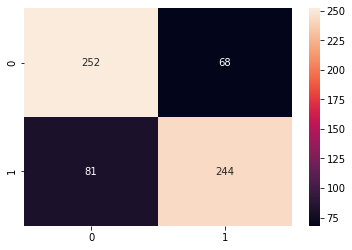

In [338]:
cm2 = confusion_matrix(y_test,Logistic_model.predict(x_test))
sns.heatmap(cm2,annot=True,fmt="d")

In [339]:
print ('Accuracy Score is',accuracy_score(y_test,Logistic_model.predict(x_test)))
print('AUC-ROC:',roc_auc_score(y_test,Logistic_model.predict(x_test)))
print('LOGLOSS Value is',log_loss(y_test,Logistic_model.predict(x_test)))
print ('Classification Report : ')
print (classification_report(y_test,Logistic_model.predict(x_test)))

Accuracy Score is 0.7689922480620155
AUC-ROC: 0.7691346153846155
LOGLOSS Value is 7.978809388320844
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       320
           1       0.78      0.75      0.77       325

    accuracy                           0.77       645
   macro avg       0.77      0.77      0.77       645
weighted avg       0.77      0.77      0.77       645



In [340]:
print ('Accuracy Score is',accuracy_score(y_test,Logistic_model.predict(x_test)))
print("Precision score: {}".format(precision_score(y_test,Logistic_model.predict(x_test))))
print("Recall score: {}".format(recall_score(y_test,Logistic_model.predict(x_test))))
print("F1 Score: {}".format(f1_score(y_test,Logistic_model.predict(x_test))))

Accuracy Score is 0.7689922480620155
Precision score: 0.782051282051282
Recall score: 0.7507692307692307
F1 Score: 0.7660910518053375


## 3) Ensemble Methods
Bagging Classifier 

In [341]:
%%time

# parameters candidates
parameters = {'base_estimator__max_depth': [4,6,8,12,24,32],
              'n_estimators': [20, 50, 100, 200]}

# fitting
Bagging_GSCV = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), random_state=8017), 
                            parameters, n_jobs=-1, verbose=3, return_train_score=True)
Bagging_GSCV.fit(x_train, y_train)
Bagging_model = Bagging_GSCV.best_estimator_
Bagging_model

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   46.3s finished


Wall time: 47.1 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=100, random_state=8017)

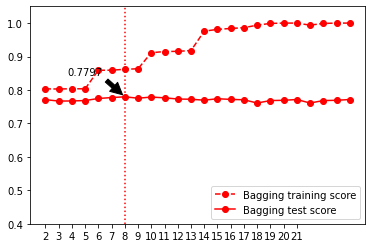

Wall time: 335 ms


In [342]:
%%time
train_bagging_scores = Bagging_GSCV.cv_results_['mean_train_score']
test_bagging_scores = Bagging_GSCV.cv_results_['mean_test_score']

#plt.plot(test_dt_scores, 'go-')
plt.plot(train_bagging_scores, 'ro--')
plt.plot(test_bagging_scores, 'ro-')
plt.ylim(0.4, 1.05)
plt.xticks(range(20), range(2, 22))
plt.legend(["Bagging training score", "Bagging test score"])
plt.axvline(np.argmax(test_bagging_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_bagging_scores).round(4), (np.argmax(test_bagging_scores), np.max(test_bagging_scores)), xycoords="data",
                 xytext=(-40, 30), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [343]:
# accuracy scores
print(Bagging_model.get_params())
print(f"Training Score: {round(Bagging_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(Bagging_model.score(x_test, y_test),4)}")

{'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 6, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=6), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 8017, 'verbose': 0, 'warm_start': False}
Training Score: 0.8553
Testing Score: 0.7798


<AxesSubplot:>

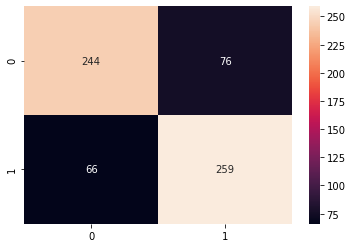

In [344]:
cm3 = confusion_matrix(y_test,Bagging_GSCV.predict(x_test))
sns.heatmap(cm3,annot=True,fmt="d")

In [345]:
print ('Accuracy Score is',accuracy_score(y_test,Bagging_GSCV.predict(x_test)))
print('AUC-ROC:',roc_auc_score(y_test,Bagging_GSCV.predict(x_test)))
print('LOGLOSS Value is',log_loss(y_test,Bagging_GSCV.predict(x_test)))
print ('Classification Report : ')
print (classification_report(y_test,Bagging_GSCV.predict(x_test)))

Accuracy Score is 0.7798449612403101
AUC-ROC: 0.7797115384615384
LOGLOSS Value is 7.603979872065135
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       320
           1       0.77      0.80      0.78       325

    accuracy                           0.78       645
   macro avg       0.78      0.78      0.78       645
weighted avg       0.78      0.78      0.78       645



In [346]:
print ('Accuracy Score is',accuracy_score(y_test,Bagging_GSCV.predict(x_test)))
print("Precision score: {}".format(precision_score(y_test,Bagging_GSCV.predict(x_test))))
print("Recall score: {}".format(recall_score(y_test,Bagging_GSCV.predict(x_test))))
print("F1 Score: {}".format(f1_score(y_test,Bagging_GSCV.predict(x_test))))

Accuracy Score is 0.7798449612403101
Precision score: 0.7731343283582089
Recall score: 0.796923076923077
F1 Score: 0.7848484848484849


## 4) Random Forest Classifier

In [347]:
%%time

# parameters candidates
parameters = {'n_estimators': [20, 50, 100, 200],
              'max_depth':[6,8,12,24,32,48]}

# fitting
RandomForest_GSCV = GridSearchCV(RandomForestClassifier(random_state=8017), 
                                 parameters, n_jobs=-1, verbose=3)
RandomForest_GSCV.fit(x_train, y_train)
RandomForest_model = RandomForest_GSCV.best_estimator_
RandomForest_model

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   18.5s finished


Wall time: 19.3 s


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=8017)

In [348]:
# accuracy scores
print(RandomForest_model.get_params())
print(f"Training Score: {round(RandomForest_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(RandomForest_model.score(x_test, y_test),4)}")

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 8017, 'verbose': 0, 'warm_start': False}
Training Score: 0.8782
Testing Score: 0.7829


<AxesSubplot:>

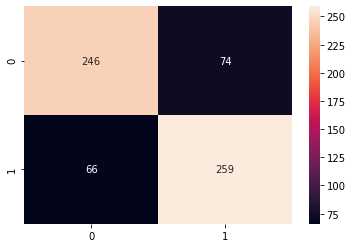

In [349]:
cm4 = confusion_matrix(y_test,RandomForest_GSCV.predict(x_test))
sns.heatmap(cm4,annot=True,fmt="d")

In [350]:
print ('Accuracy Score is',accuracy_score(y_test,RandomForest_GSCV.predict(x_test)))
print('AUC-ROC:',roc_auc_score(y_test,RandomForest_GSCV.predict(x_test)))
print('LOGLOSS Value is',log_loss(y_test,RandomForest_GSCV.predict(x_test)))
print ('Classification Report : ')
print (classification_report(y_test,RandomForest_GSCV.predict(x_test)))

Accuracy Score is 0.7829457364341085
AUC-ROC: 0.7828365384615386
LOGLOSS Value is 7.496880411623769
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       320
           1       0.78      0.80      0.79       325

    accuracy                           0.78       645
   macro avg       0.78      0.78      0.78       645
weighted avg       0.78      0.78      0.78       645



In [351]:
print ('Accuracy Score is',accuracy_score(y_test,RandomForest_GSCV.predict(x_test)))
print("Precision score: {}".format(precision_score(y_test,RandomForest_GSCV.predict(x_test))))
print("Recall score: {}".format(recall_score(y_test,RandomForest_GSCV.predict(x_test))))
print("F1 Score: {}".format(f1_score(y_test,RandomForest_GSCV.predict(x_test))))

Accuracy Score is 0.7829457364341085
Precision score: 0.7777777777777778
Recall score: 0.796923076923077
F1 Score: 0.7872340425531915


## 5) Adaboost 

In [352]:
%%time

# parameters candidates
parameters = {'base_estimator__max_depth': [2,3,4,6,8,12,32],
              'n_estimators': [20, 50, 100, 200]}

# fitting
Adaboost_GSCV = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(), random_state=8017), 
                             parameters, n_jobs=-1, verbose=3)
Adaboost_GSCV.fit(x_train, y_train)
Adaboost_model = Adaboost_GSCV.best_estimator_
Adaboost_model

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   43.7s finished


Wall time: 47.5 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),
                   n_estimators=200, random_state=8017)

In [353]:
# accuracy scores
print(Adaboost_model.get_params())
print(f"Training Score: {round(Adaboost_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(Adaboost_model.score(x_test, y_test),4)}")

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 12, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=12), 'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 8017}
Training Score: 1.0
Testing Score: 0.7705


<AxesSubplot:>

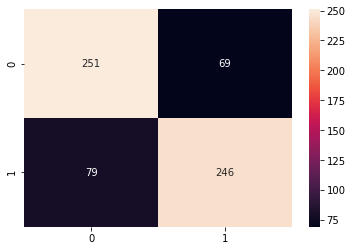

In [354]:
cm5 = confusion_matrix(y_test,Adaboost_GSCV.predict(x_test))
sns.heatmap(cm5,annot=True,fmt="d")

In [355]:
print ('Accuracy Score is',accuracy_score(y_test,Adaboost_GSCV.predict(x_test)))
print('AUC-ROC:',roc_auc_score(y_test,Adaboost_GSCV.predict(x_test)))
print('LOGLOSS Value is',log_loss(y_test,Adaboost_GSCV.predict(x_test)))
print ('Classification Report : ')
print (classification_report(y_test,Adaboost_GSCV.predict(x_test)))

Accuracy Score is 0.7705426356589147
AUC-ROC: 0.7706490384615384
LOGLOSS Value is 7.925262137472039
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       320
           1       0.78      0.76      0.77       325

    accuracy                           0.77       645
   macro avg       0.77      0.77      0.77       645
weighted avg       0.77      0.77      0.77       645



In [356]:
print ('Accuracy Score is',accuracy_score(y_test,Adaboost_GSCV.predict(x_test)))
print("Precision score: {}".format(precision_score(y_test,Adaboost_GSCV.predict(x_test))))
print("Recall score: {}".format(recall_score(y_test,Adaboost_GSCV.predict(x_test))))
print("F1 Score: {}".format(f1_score(y_test,Adaboost_GSCV.predict(x_test))))

Accuracy Score is 0.7705426356589147
Precision score: 0.780952380952381
Recall score: 0.7569230769230769
F1 Score: 0.7687499999999999


## 6) Gradient Boosting 

In [357]:
%%time

# parameters candidates
parameters = {'max_depth': [2,4,6,8,10,12,32],
              'n_estimators': [200],
              'learning_rate': [0.01]}

# fitting
GradientBoost_GSCV = GridSearchCV(GradientBoostingClassifier(random_state=8017), 
                             parameters, n_jobs=-1, verbose=3)
GradientBoost_GSCV.fit(x_train, y_train)
GradientBoost_model = GradientBoost_GSCV.best_estimator_
GradientBoost_model

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   55.5s finished


Wall time: 56.8 s


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200,
                           random_state=8017)

In [358]:
# accuracy scores
print(GradientBoost_model.get_params())
print(f"Training Score: {round(GradientBoost_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(GradientBoost_model.score(x_test, y_test),4)}")

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 8017, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Score: 0.822
Testing Score: 0.7829


<AxesSubplot:>

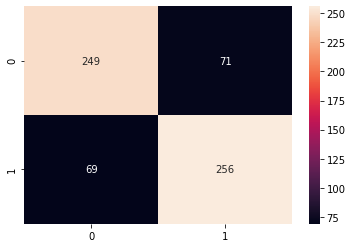

In [359]:
cm6 = confusion_matrix(y_test,GradientBoost_GSCV.predict(x_test))
sns.heatmap(cm6,annot=True,fmt="d")

In [360]:
print ('Accuracy Score is',accuracy_score(y_test,GradientBoost_GSCV.predict(x_test)))
print('AUC-ROC:',roc_auc_score(y_test,GradientBoost_GSCV.predict(x_test)))
print('LOGLOSS Value is',log_loss(y_test,GradientBoost_GSCV.predict(x_test)))
print ('Classification Report : ')
print (classification_report(y_test,GradientBoost_GSCV.predict(x_test)))

Accuracy Score is 0.7829457364341085
AUC-ROC: 0.7829086538461538
LOGLOSS Value is 7.4968766925659525
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       320
           1       0.78      0.79      0.79       325

    accuracy                           0.78       645
   macro avg       0.78      0.78      0.78       645
weighted avg       0.78      0.78      0.78       645



In [361]:
print ('Accuracy Score is',accuracy_score(y_test,GradientBoost_GSCV.predict(x_test)))
print("Precision score: {}".format(precision_score(y_test,GradientBoost_GSCV.predict(x_test))))
print("Recall score: {}".format(recall_score(y_test,GradientBoost_GSCV.predict(x_test))))
print("F1 Score: {}".format(f1_score(y_test,GradientBoost_GSCV.predict(x_test))))

Accuracy Score is 0.7829457364341085
Precision score: 0.7828746177370031
Recall score: 0.7876923076923077
F1 Score: 0.7852760736196318


## 7) Support Vector Machine
Linear SVC 

In [362]:
%%time

# parameters candidates
parameters = {'C': np.logspace(-4, 4, 50)}

# fitting
LinearSVC_GSCV = GridSearchCV(LinearSVC(dual=False, random_state=8017), 
                              parameters, n_jobs=-1, verbose=3)
LinearSVC_GSCV.fit(x_train, y_train)
LinearSVC_model = LinearSVC_GSCV.best_estimator_
LinearSVC_model

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


Wall time: 487 ms


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished


LinearSVC(C=0.0020235896477251557, dual=False, random_state=8017)

In [363]:
# accuracy scores
print(LinearSVC_model.get_params())
print(f"Training Score: {round(LinearSVC_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(LinearSVC_model.score(x_test, y_test),4)}")

{'C': 0.0020235896477251557, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 8017, 'tol': 0.0001, 'verbose': 0}
Training Score: 0.768
Testing Score: 0.7752


<AxesSubplot:>

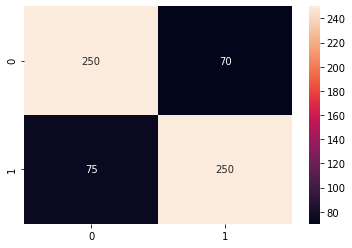

In [364]:
cm7 = confusion_matrix(y_test,LinearSVC_GSCV.predict(x_test))
sns.heatmap(cm7,annot=True,fmt="d")

In [365]:
print ('Accuracy Score is',accuracy_score(y_test,LinearSVC_GSCV.predict(x_test)))
print('AUC-ROC:',roc_auc_score(y_test,LinearSVC_GSCV.predict(x_test)))
print('LOGLOSS Value is',log_loss(y_test,LinearSVC_GSCV.predict(x_test)))
print ('Classification Report : ')
print (classification_report(y_test,LinearSVC_GSCV.predict(x_test)))

Accuracy Score is 0.7751937984496124
AUC-ROC: 0.7752403846153846
LOGLOSS Value is 7.76461790555374
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       320
           1       0.78      0.77      0.78       325

    accuracy                           0.78       645
   macro avg       0.78      0.78      0.78       645
weighted avg       0.78      0.78      0.78       645



In [366]:
print ('Accuracy Score is',accuracy_score(y_test,LinearSVC_GSCV.predict(x_test)))
print("Precision score: {}".format(precision_score(y_test,LinearSVC_GSCV.predict(x_test))))
print("Recall score: {}".format(recall_score(y_test,LinearSVC_GSCV.predict(x_test))))
print("F1 Score: {}".format(f1_score(y_test,LinearSVC_GSCV.predict(x_test))))

Accuracy Score is 0.7751937984496124
Precision score: 0.78125
Recall score: 0.7692307692307693
F1 Score: 0.7751937984496126


## 8) Non-Linear SVC 

In [367]:
%%time

# fitting
SVC_model = SVC(kernel='rbf', random_state=8017)
SVC_model.fit(x_train, y_train)
SVC_model

Wall time: 208 ms


SVC(random_state=8017)

In [368]:
%%time
# accuracy scores
print(SVC_model.get_params())
print(f"Training Score: {round(SVC_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(SVC_model.score(x_test, y_test),4)}")

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 8017, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training Score: 0.801
Testing Score: 0.7783
Wall time: 144 ms


<AxesSubplot:>

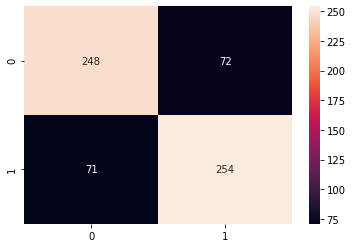

In [369]:
cm8 = confusion_matrix(y_test,SVC_model.predict(x_test))
sns.heatmap(cm8,annot=True,fmt="d")

In [370]:
print ('Accuracy Score is',accuracy_score(y_test,SVC_model.predict(x_test)))
print('AUC-ROC:',roc_auc_score(y_test,SVC_model.predict(x_test)))
print('LOGLOSS Value is',log_loss(y_test,SVC_model.predict(x_test)))
print ('Classification Report : ')
print (classification_report(y_test,SVC_model.predict(x_test)))

Accuracy Score is 0.7782945736434108
AUC-ROC: 0.7782692307692307
LOGLOSS Value is 7.6575234038561275
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       320
           1       0.78      0.78      0.78       325

    accuracy                           0.78       645
   macro avg       0.78      0.78      0.78       645
weighted avg       0.78      0.78      0.78       645



In [371]:
print ('Accuracy Score is',accuracy_score(y_test,SVC_model.predict(x_test)))
print("Precision score: {}".format(precision_score(y_test,SVC_model.predict(x_test))))
print("Recall score: {}".format(recall_score(y_test,SVC_model.predict(x_test))))
print("F1 Score: {}".format(f1_score(y_test,SVC_model.predict(x_test))))

Accuracy Score is 0.7782945736434108
Precision score: 0.7791411042944786
Recall score: 0.7815384615384615
F1 Score: 0.7803379416282642
